In [1]:
import tensorflow.keras as keras
from tensorflow.keras import initializers,regularizers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, Concatenate, BatchNormalization, LeakyReLU
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.keras.backend as K
import math
import matplotlib.pylab as plt
import matplotlib
from random import random
from sklearn.utils import resample
import seaborn as sns
import corner
import pickle
from methods import *

In [2]:
rs = 30

In [3]:
import numpy as np
import pandas as pd

In [4]:
from numpy.random import seed
seed(1)
from tensorflow.random import set_seed
set_seed(2)

## Read in the files

In [5]:
iron = pd.read_csv('files/Iron.csv')
proton = pd.read_csv('files/Proton.csv')
helium = pd.read_csv('files/Helium.csv')
oxygen = pd.read_csv('files/Oxygen.csv')
proton2 = pd.read_csv('files/Proton2.csv')
iron2 =  pd.read_csv('files/Iron2.csv')
proton3 = pd.read_csv('files/Proton3.csv')
iron3 = pd.read_csv('files/Iron3.csv')
proton4 = pd.read_csv('files/Proton4.csv')
iron4 = pd.read_csv('files/Iron4.csv')

In [6]:
iron_cut1 = cut_values(np.log10(iron['energy'].values))
proton_cut1 = cut_values(np.log10(proton['energy'].values))
helium_cut1 = cut_values(np.log10(helium['energy'].values))
oxygen_cut1 = cut_values(np.log10(oxygen['energy'].values))

In [7]:
data = pd.read_csv('files/data.csv')

In [8]:
iron.keys()

Index(['Unnamed: 0', 'mass', 'energy', 'zenith', 'S125', 'energy_loss',
       'he_stoch', 'he_stoch2', 'Xmax', 'Xo', 'A', 'm_125', 'm_r', 'm_s',
       'm_s2', 'm_o', 'm_chi2', 'fit_status_m', 's_r', 's_o', 's_mean',
       's_std', 's_chi2', 'fit_status_s', 'charge', 'N', 'ghRedChiSqr',
       'firstint', 'max_check', 'new_xmax', 'new_xo', 'new_lambda',
       'fit_status', 'new_chi2', 'difference', 'MaxNum', 'waveform_weight'],
      dtype='object')

## Apply the cuts from the above functions

In [9]:
iron = new_df(iron,4)
proton = new_df(proton,1)
helium = new_df(helium,2)
oxygen = new_df(oxygen,3)
proton2 = new_df(proton2,1)
iron2 = new_df(iron2,4)
proton3 = new_df(proton3,1)
iron3 = new_df(iron3,4)
proton4 = new_df(proton4,1)
iron4 = new_df(iron4,4)

/home/andy/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/andy/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/andy/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/andy/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/andy/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/andy/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: div

In [10]:
iron_cut2 = cut_values(np.log10(iron['energy'].values))
proton_cut2 = cut_values(np.log10(proton['energy'].values))
helium_cut2 = cut_values(np.log10(helium['energy'].values))
oxygen_cut2 = cut_values(np.log10(oxygen['energy'].values))

In [11]:
proton_cut1,proton_cut2

([2157, 2229, 2159, 1382, 956, 906, 825, 995, 969, 1097],
 [810, 1213, 1093, 688, 481, 411, 353, 374, 285, 301])

In [12]:
data = new_df_data(data)

/home/andy/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [13]:
df = iron.append(proton)
df = df.append(helium)
df = df.append(oxygen)
#df = df.append(proton2)
#df = df.append(iron2)
#df = df.append(proton3)
#df = df.append(iron3)
#df = df.append(proton4)
#df = df.append(iron4)

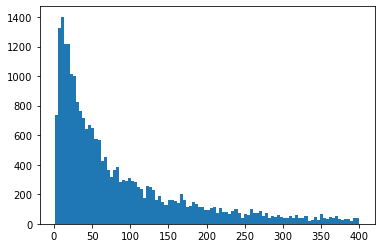

In [14]:
plt.hist(df['ghRedChiSqr'],bins=100)
plt.show()

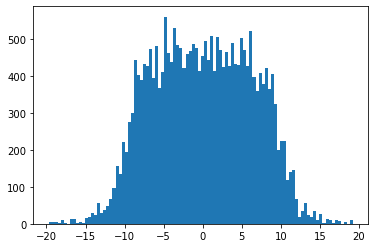

In [15]:
plt.hist(df['max_check'][abs(df['max_check'])<20],bins=100)
plt.show()

## Plots to understand the distributions of the variables

In [16]:
df['log_energy'] = df['log_energy'].values

In [17]:
df.head()

Unnamed: 0  mass      energy    zenith      S125  energy_loss  he_stoch  \
0            0     4  33181566.0  0.382189  1.562163   189.121448         3   
2            2     4  33181566.0  0.380478  1.568851   186.599907         3   
3            3     4  33181566.0  0.384414  1.596185   144.241157         4   
21          21     4  92080440.0  0.094941  2.065233   430.736401        10   
22          22     4  92080440.0  0.086432  2.098824   552.119408         9   

    he_stoch2        Xmax         Xo  ...  waveform_weight  log_energy  \
0           1  554.648804  19.267458  ...         0.000000    7.520897   
2           1  554.648804  19.267458  ...         1.280572    7.520897   
3           0  554.648804  19.267458  ...         1.675668    7.520897   
21          0  553.176270 -70.772858  ...         1.000000    7.964167   
22          0  553.176270 -70.772858  ...         1.000000    7.964167   

    cos_zenith  log_energy_loss   log_m_r   log_s_r  log_charge     log_A  \
0     0.927851         2.276741 -3.202906 -5.269070    3.139204 -3.196973   
2     0.928487         2.270911 -3.361286 -7.705093    3.287585 -3.313512   
3     0.927018         2.159089 -3.077271 -3.379087    2.981812 -3.233955   
21    0.995496         2.634212 -3.068610 -2.263100    3.744920 -3.296734   
22    0.996267         2.742033 -3.346696 -5.659537    3.902943 -3.193633   

          new  new_s125  
0   30.399626  0.762779  
2   30.399626  0.848921  
3   30.399626  0.863148  
21  76.730209  1.543685  
22  76.730209  0.759912  

[5 rows x 46 columns]

In [18]:
check = [math.isnan(i)==0 for i in df['log_energy_loss'].values]

In [19]:
check_data = [math.isnan(i)==0 for i in data['log_energy_loss'].values]

In [20]:
df_coinc = df[check]

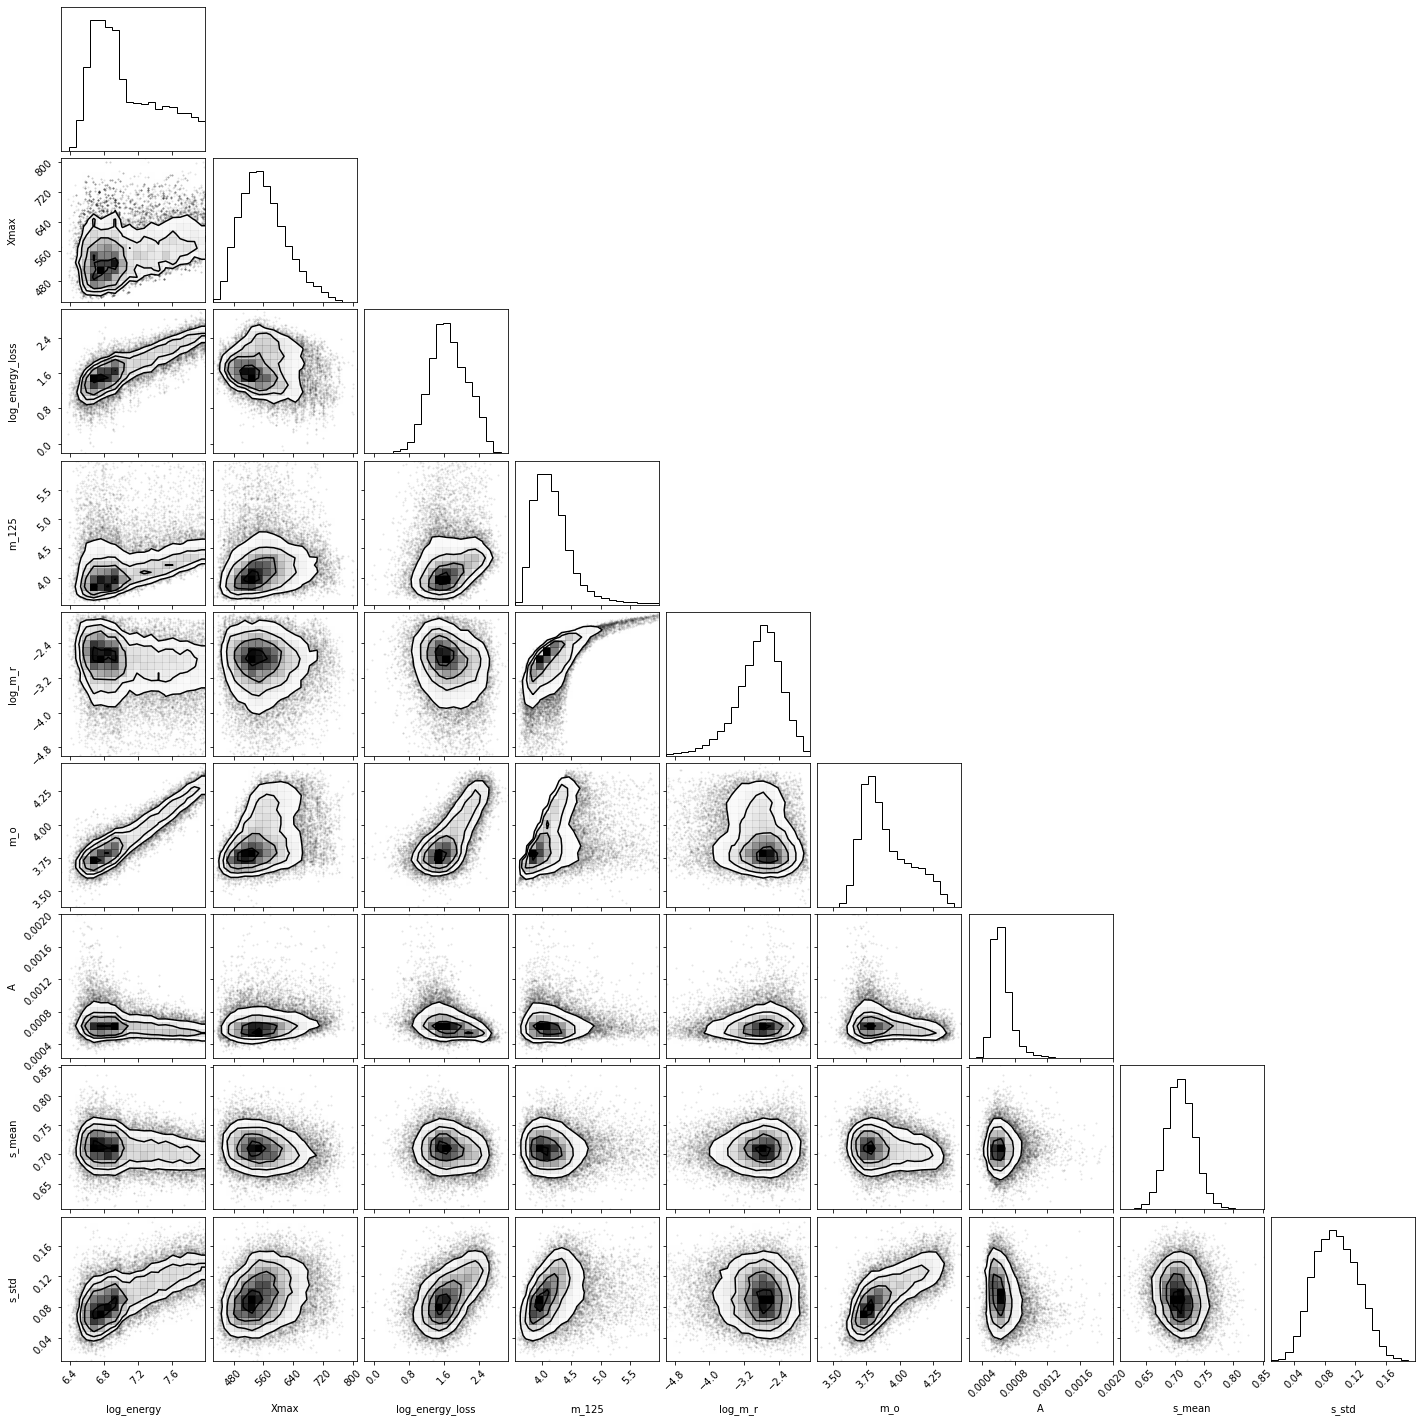

In [21]:
corner.corner(df_coinc[['log_energy','Xmax','log_energy_loss','m_125','log_m_r','m_o','A','s_mean','s_std']])
plt.savefig('corner_plot.png')

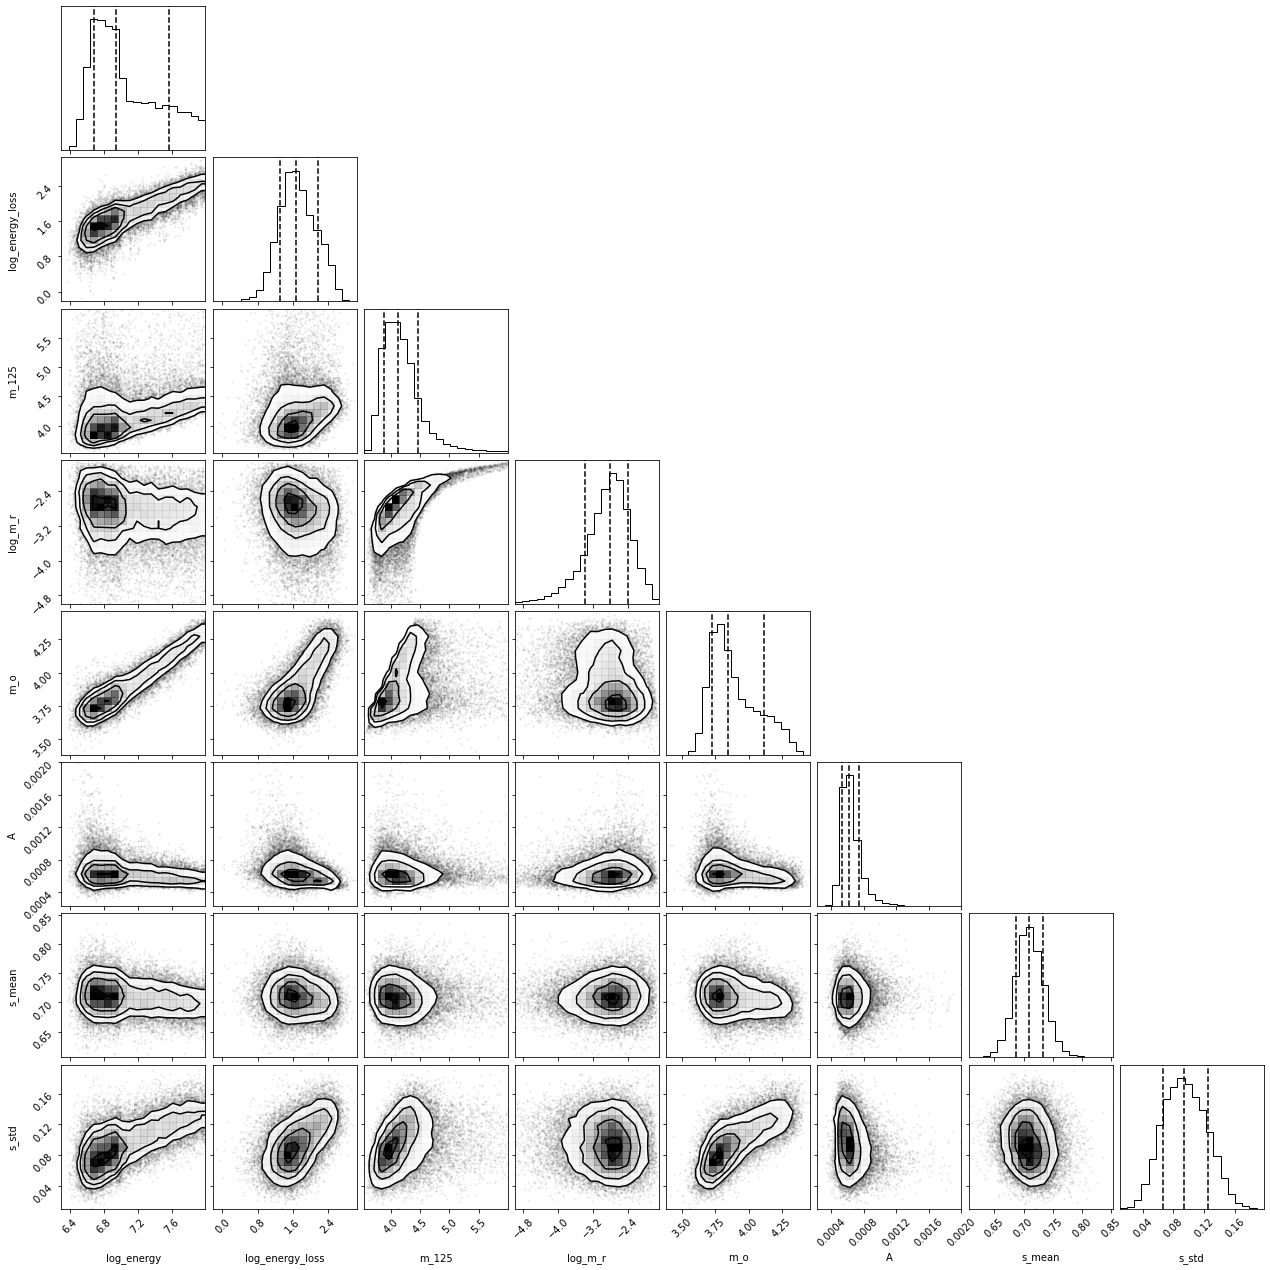

In [22]:
corner.corner(df_coinc[['log_energy','log_energy_loss','m_125','log_m_r','m_o','A','s_mean','s_std']],quantiles=[0.16, 0.5, 0.84])
plt.savefig('corner_plot_energy.png')

In [23]:
df_coinc = df_coinc.reset_index()

In [24]:
corr = np.corrcoef(df_coinc[['cos_zenith','S125','log_energy_loss','he_stoch','he_stoch2','m_o','s_std','A']].values,rowvar=False)

In [25]:
VIF = np.linalg.inv(corr)

In [26]:
VIF.diagonal()

array([ 1.16903184, 10.46584937,  3.05417537,  1.40490589,  1.06601833,
        8.96730624,  2.12677737,  1.14265207])

In [27]:
data_coinc = data[check_data]
data_coinc = data_coinc.reset_index()

## Check Correlation Coefficients for Variables

In [28]:
df_coinc.corr()[['Xmax','log_energy','mass','Xo']]

Xmax    log_energy          mass            Xo
index            2.719733e-02 -1.585196e-02 -6.612309e-02  2.274992e-03
Unnamed: 0       2.719733e-02 -1.585196e-02 -6.612309e-02  2.274992e-03
mass            -5.714126e-01  5.686517e-02  1.000000e+00 -2.097785e-01
energy           3.182155e-01  9.200140e-01  3.915114e-02 -7.533110e-02
zenith           1.577027e-02 -1.858657e-02  1.410941e-02 -5.241186e-02
S125             3.519210e-01  9.899136e-01  4.755218e-02 -6.533089e-02
energy_loss     -1.045089e-02  7.782662e-01  3.208364e-01 -1.966361e-01
he_stoch        -4.820694e-02  3.512054e-01  1.759017e-01 -8.866270e-02
he_stoch2        5.406421e-03 -3.092507e-02 -9.173086e-03  1.566705e-02
Xmax             1.000000e+00  3.304030e-01 -5.714126e-01  3.804329e-01
Xo               3.804329e-01 -8.539041e-02 -2.097785e-01  1.000000e+00
A                1.415086e-01 -2.885222e-01 -1.735092e-01  1.558980e-01
m_125            1.569031e-01  3.210581e-01 -3.895695e-02  1.613313e-02
m_r             -4.821173e-02 -1.704452e-01 -3.288654e-02  3.910126e-02
m_s              2.705868e-14 -1.030737e-13  6.612850e-15  1.981080e-14
m_s2             2.705868e-14 -1.030737e-13  6.612850e-15  1.981080e-14
m_o              3.877713e-01  9.212215e-01 -1.645556e-02 -3.853068e-02
m_chi2           2.804662e-01  8.614022e-01  5.723434e-02 -7.251620e-02
fit_status_m              NaN           NaN           NaN           NaN
s_r             -7.447388e-03 -3.112782e-02  3.506025e-03  2.659409e-03
s_o              7.205107e-03  1.319786e-02  5.276257e-03 -1.047364e-02
s_mean          -1.466955e-01 -2.030950e-01  7.853255e-02 -8.281779e-03
s_std            2.486929e-01  6.624955e-01  5.538450e-02 -2.665096e-02
s_chi2           9.168459e-02  4.033708e-01  5.239356e-02 -5.580136e-02
fit_status_s     1.000587e-02  1.931371e-02  8.477159e-03  5.129714e-03
charge           2.678704e-01  6.778578e-01  8.648938e-03 -4.194298e-02
N                2.668839e-01  9.111931e-01  9.563997e-02 -8.668640e-02
ghRedChiSqr      1.988018e-01  4.123617e-01 -5.279036e-02  2.347990e-01
firstint         6.108494e-01 -1.235195e-01 -4.044710e-01  7.350692e-01
max_check        7.294346e-02 -2.134631e-03 -8.949920e-02  7.332941e-02
new_xmax         4.595519e-01  2.827355e-01 -1.937393e-01 -3.329642e-02
new_xo          -1.072396e-01  1.657682e-01  1.169416e-01 -3.106310e-01
new_lambda       1.788586e-01 -8.694893e-02 -7.828842e-02  3.126305e-01
fit_status       1.172413e-01 -3.180334e-01 -1.365224e-01  5.713908e-01
new_chi2                  NaN           NaN           NaN           NaN
difference      -9.401932e-02  1.816730e-01  1.194091e-01 -3.354428e-01
MaxNum           3.287608e-01  9.158068e-01  5.894060e-03 -6.719676e-02
waveform_weight  1.099211e-02  5.716505e-04 -9.315238e-03  1.352254e-02
log_energy       3.304030e-01  1.000000e+00  5.686517e-02 -8.539041e-02
cos_zenith      -1.837287e-02  2.053801e-02 -6.255214e-03  5.484774e-02
log_energy_loss -1.186799e-01  8.129696e-01  4.016809e-01 -2.718259e-01
log_m_r         -4.769034e-02 -1.816039e-01 -3.025215e-02  4.309419e-02
log_s_r         -5.895258e-02 -1.593515e-01 -1.519514e-02  1.786900e-02
log_charge       3.039906e-01  7.620836e-01  1.300597e-02 -4.254110e-02
log_A            1.590522e-01 -2.971495e-01 -1.944486e-01  1.640652e-01
new             -8.911118e-02  2.991253e-02 -1.912281e-04 -8.691896e-01
new_s125        -5.654263e-03 -2.618663e-02  3.970271e-03  8.265421e-04

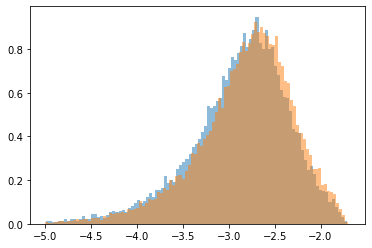

In [29]:
plt.hist(df_coinc['log_m_r'],bins=100,alpha=0.5,density=True)
plt.hist(data_coinc['log_m_r'],bins=100,alpha=0.5,density=True)
plt.show()

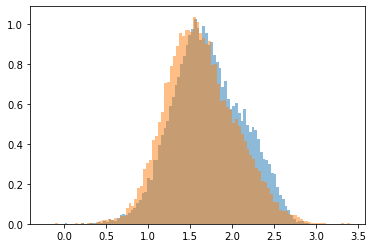

In [30]:
plt.hist(df_coinc['log_energy_loss'],bins=100,alpha=0.5,density=True)
plt.hist(data_coinc['log_energy_loss'],bins=100,alpha=0.5,density=True)
plt.show()

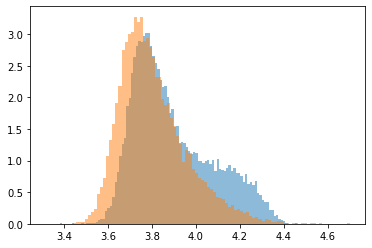

In [31]:
plt.hist(df_coinc['m_o'],bins=100,alpha=0.5,density=True)
plt.hist(data_coinc['m_o'],bins=100,alpha=0.5,density=True)
plt.show()

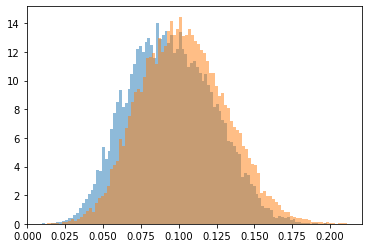

In [32]:
plt.hist(df_coinc['s_std'],bins=100,alpha=0.5,density=True)
plt.hist(data_coinc['s_std'],bins=100,alpha=0.5,density=True)
plt.show()

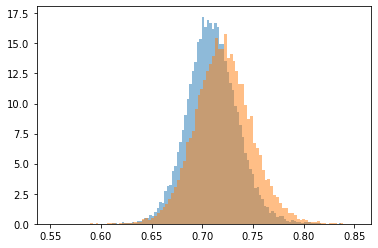

In [33]:
plt.hist(df_coinc['s_mean'],bins=100,alpha=0.5,density=True)
plt.hist(data_coinc['s_mean'],bins=100,alpha=0.5,density=True)
plt.show()

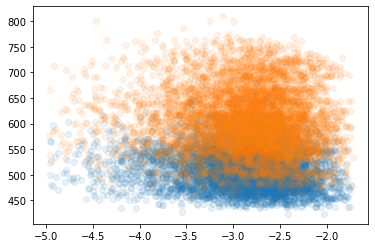

In [34]:
plt.scatter(df_coinc['log_m_r'][df_coinc['mass']==4],df_coinc['Xmax'][df_coinc['mass']==4],alpha=0.1)
plt.scatter(df_coinc['log_m_r'][df_coinc['mass']==1],df_coinc['Xmax'][df_coinc['mass']==1],alpha=0.1)
plt.show()

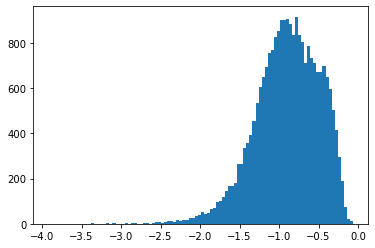

In [35]:
plt.hist(np.log10(df_coinc['m_chi2']),bins=100)
plt.show()

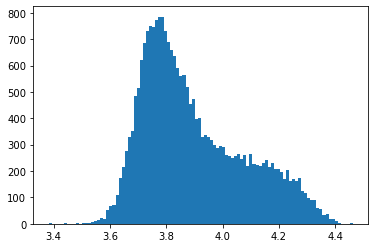

In [36]:
plt.hist(df_coinc['m_o'],bins=100)
plt.show()

## Make train test splits and data

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
test = df_coinc.sample(frac=0.1,random_state=rs)

In [39]:
output_variables = ['log_energy','Xmax','mass']
input_variables = ['cos_zenith','S125','log_energy_loss','he_stoch','he_stoch2','m_r','m_o','m_125','s_mean','s_std','A','waveform_weight']

In [40]:
test_y =  test[output_variables].values
test_X = test[input_variables].values

In [41]:
df_coinc = df_coinc.drop(test.index)
df_coinc = df_coinc.reset_index()

In [42]:
y = df_coinc[output_variables].values
X = df_coinc[input_variables].values

In [43]:
X_data = data_coinc[input_variables[0:-1]].values

In [44]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=rs)

In [45]:
variable = list(zip(*X_train))
#weight = np.array(variable[-1])
X_train1 = X_train[:,0:-1]
X_validation1 = X_validation[:,0:-1]

In [46]:
weight = []
for i in y_train:
    if i[0] == 1:
        weight.append(1)
    elif i[0] == 2:
        weight.append(len(proton)/len(helium))
    elif i[0] == 3:
        weight.append(len(proton)/len(oxygen))
    else:
        weight.append(len(proton)/len(iron))
weight=np.array(weight)

In [47]:
waveform_weight = []

In [48]:
for i in list(zip(*X_train))[-1]:
    if i == 0:
        waveform_weight.append(1)
        continue
    waveform_weight.append(i)
waveform_weight = np.array(waveform_weight)

In [49]:
iron_train = cut_values(y_train[:,0],mass=y_train[:,-1],mass_value=4)
proton_train = cut_values(y_train[:,0],mass=y_train[:,-1],mass_value=1)
helium_train = cut_values(y_train[:,0],mass=y_train[:,-1],mass_value=2)
oxygen_train = cut_values(y_train[:,0],mass=y_train[:,-1],mass_value=3)

In [50]:
iron_validation = cut_values(y_validation[:,0],mass=y_validation[:,-1],mass_value=4)
proton_validation = cut_values(y_validation[:,0],mass=y_validation[:,-1],mass_value=1)
helium_validation = cut_values(y_validation[:,0],mass=y_validation[:,-1],mass_value=2)
oxygen_validation = cut_values(y_validation[:,0],mass=y_validation[:,-1],mass_value=3)

In [51]:
iron_test = cut_values(test_y[:,0],mass=test_y[:,-1],mass_value=4)
proton_test = cut_values(test_y[:,0],mass=test_y[:,-1],mass_value=1)
helium_test = cut_values(test_y[:,0],mass=test_y[:,-1],mass_value=2)
oxygen_test = cut_values(test_y[:,0],mass=test_y[:,-1],mass_value=3)

# Fit the Neural Network

In [52]:
model_best = 'model_coinc_best.h5'

best_model = keras.callbacks.ModelCheckpoint(model_best,
                                             monitor='val_loss',
                                             save_best_only=True,
                                             save_weights_only=False,
                                             mode='auto')

es = EarlyStopping(monitor='val_loss',patience=20,restore_best_weights=True)

input_layer = Input(shape=(len(X_train1[0]),))

model1 = BatchNormalization()(input_layer)

model1 = Dense(12,bias_regularizer=keras.regularizers.l1(1e-1))(model1)

model1 = LeakyReLU(alpha=0.2)(model1)

model2 = BatchNormalization()(model1)

model2 = Dense(7)(model2)

model2 = LeakyReLU(alpha=0.2)(model2)

model3 = Concatenate(axis=-1,activity_regularizer=keras.regularizers.l2(1e-5))([input_layer,model2])

model3 = Dropout(0.5)(model3)

model3 = BatchNormalization(renorm=True)(model3)

prediction1 = Dense(3,activation='linear',kernel_regularizer = keras.regularizers.l2(1e-5))(model3)

model = Model(inputs=input_layer,outputs=prediction1)

opt = keras.optimizers.Adam(decay=1e-5)

model.compile(optimizer=opt , loss = 'mse')


In [53]:
history = model.fit(X_train1,y_train[:,0:3],
                    epochs=500,
                    shuffle=True,
                    validation_data = (X_validation1,y_validation[:,0:3]),
                    callbacks=[best_model,es],
                    sample_weight=weight)

Epoch 1/500
541/541 [==============================] - 1s 1ms/step - loss: 111206.7031 - val_loss: 103432.4219
Epoch 2/500
541/541 [==============================] - 1s 944us/step - loss: 103201.7734 - val_loss: 91684.2344
Epoch 3/500
541/541 [==============================] - 1s 1ms/step - loss: 87492.9766 - val_loss: 73782.8906
Epoch 4/500
541/541 [==============================] - 1s 1ms/step - loss: 68187.4531 - val_loss: 54809.8672
Epoch 5/500
541/541 [==============================] - 1s 1ms/step - loss: 48474.2539 - val_loss: 37031.6172
Epoch 6/500
541/541 [==============================] - 1s 964us/step - loss: 31203.1211 - val_loss: 22149.3672
Epoch 7/500
541/541 [==============================] - 0s 921us/step - loss: 17813.0840 - val_loss: 11755.2090
Epoch 8/500
541/541 [==============================] - 1s 931us/step - loss: 8717.9375 - val_loss: 4875.1836
Epoch 9/500
541/541 [==============================] - 1s 992us/step - loss: 3681.2800 - val_loss: 1867.1167
Epoch 10/5

## Loss curve to observe how the network performs

In [54]:
loss = history.history['loss']
val_loss = history.history['val_loss']

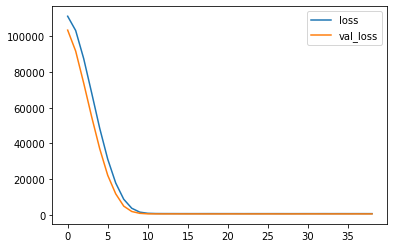

In [55]:
plt.plot(loss,label='loss')
plt.plot(val_loss,label='val_loss')
plt.legend()
plt.show()

In [56]:
best_model = load_model('model_coinc_best.h5')

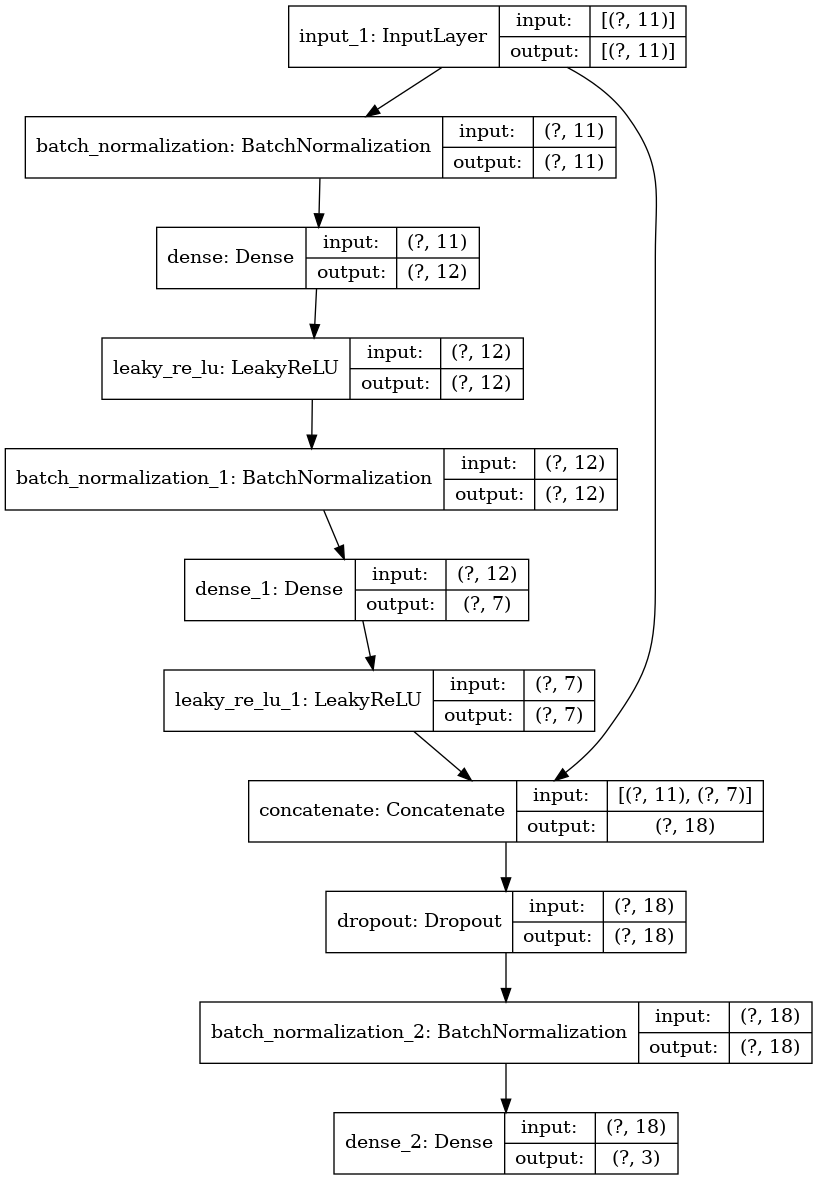

In [57]:
from tensorflow.keras.utils import plot_model
plot_model(best_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## Fit the Decision Tree

In [58]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [59]:
len(df),len(df_coinc)

(24033, 21630)

In [60]:
rmse_values = []
estimators = [10,20,30,40,50,100,200,300,400,500,600]

In [61]:
#for est in estimators:
tree =BaggingRegressor(DecisionTreeRegressor(splitter='best',max_features='log2',random_state=42),n_estimators=400,bootstrap=True,random_state=42)
tree.fit(X_train1,y_train[:,0],sample_weight=weight)
#    rmse_values.append(np.mean([(i-j)**2 for i,j in zip(tree.predict(X_validation1),list(zip(*y_validation))[0])])**0.5)

BaggingRegressor(base_estimator=DecisionTreeRegressor(max_features='log2',
                                                      random_state=42),
                 n_estimators=400, random_state=42)

In [62]:
#plt.plot(estimators,rmse_values,marker='o',linestyle='dashed',color='black')
#plt.xlabel('Number of Estimators')
#plt.ylabel('RMSE $Log_{10}$(E/GeV)')
#plt.grid(True,linestyle='dashed')
#plt.tight_layout()
#plt.savefig('RMSE_estimators.png')

In [63]:
import joblib

In [64]:
joblib.dump(tree,'energy_model.pkl')

['energy_model.pkl']

In [65]:
#best_model = BaggingRegressor(DecisionTreeRegressor(),n_estimators=400)

In [66]:
#best_model.fit(X_train1,y_train[:])

## Predictions and Comparisons

In [67]:
predictions = best_model.predict(X_validation1)

In [68]:
predictions2 = tree.predict(X_validation1)

In [69]:
energy_predictions = predictions2
energy = np.array(list(zip(*y_validation))[0])
xmax = np.array(list(zip(*y_validation))[1])
xmax_predictions = np.array(list(zip(*predictions))[1])
mass = np.array(list(zip(*y_validation))[-1])
mass_predictions = np.array(list(zip(*predictions))[-1])

In [70]:
from scipy.optimize import curve_fit
def line_function(x,m,b):
    return m * x + b
def quadratic_function(x,m,b):
    y = b + m * x
    return y

In [71]:
value = [(i-j) for i,j in zip(xmax_predictions,xmax)]

In [72]:
degrees = np.arccos(list(zip(*X_validation))[0])*180/np.pi

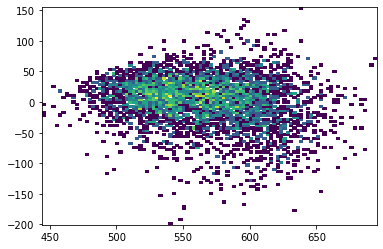

In [73]:
plt.hist2d(xmax_predictions,value,bins=100,norm=matplotlib.colors.LogNorm())
plt.show()

In [74]:
test_xmax = np.array(list(zip(*test_y)))[1]
mass2 = np.array(list(zip(*test_y)))[2]
X_validatioin_new = [np.hstack([i,j]) for i,j in zip(X_validation1,xmax_predictions)]
test_X_new = [np.hstack([i,j]) for i,j in zip(test_X,test_xmax)]

In [75]:
check_predictions = best_model.predict(test_X[:,0:-1])
check_predictions2 = tree.predict(test_X[:,0:-1])

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
line_model = LinearRegression()

In [78]:
line_model.fit(xmax_predictions.reshape(-1,1),value)

LinearRegression()

In [79]:
joblib.dump(line_model,'Xmax_bias_correction.pkl')

['Xmax_bias_correction.pkl']

In [80]:
#line_model.fit(list(zip(xmax_predictions,energy_predictions)),value)

In [81]:
bias = line_model.predict(xmax_predictions.reshape(-1,1))
bias2 = line_model.predict(test_xmax.reshape(-1,1))

In [82]:
#bias = line_model.predict(list(zip(xmax_predictions,energy_predictions)))
#bias2 = line_model.predict(list(zip(validation_xmax,check_predictions2)))

In [83]:
np.mean([(i-j)**2 for i,j in zip(xmax_predictions,list(zip(*y_validation))[1])])

1528.593744179572

In [84]:
xmax_predictions = np.array([(i-j) for i,j in zip(xmax_predictions,bias)])
xmax_predictions2 = np.array([(i-j) for i,j in zip(list(zip(*check_predictions))[1],bias2)])
mass_predictions2 = np.array(list(zip(*check_predictions))[-1])

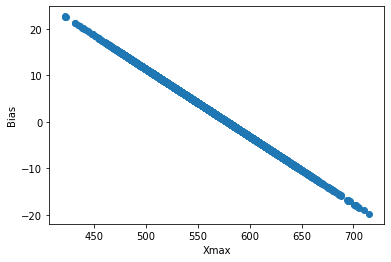

In [85]:
plt.scatter(xmax_predictions,bias)
plt.xlabel('Xmax')
plt.ylabel('Bias')
plt.savefig('Bias.png')

In [86]:
import matplotlib

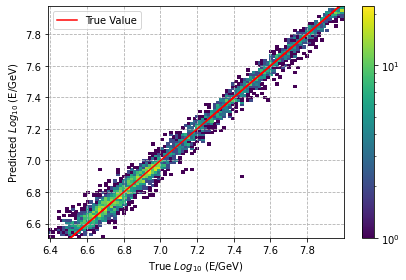

In [87]:
plt.hist2d(energy,energy_predictions,bins=100,norm=matplotlib.colors.LogNorm())
plt.xlabel('True $Log_{10}$ (E/GeV)')
plt.ylabel('Predicted $Log_{10}$ (E/GeV)')
plt.plot(energy,energy,color='r',label='True Value')
plt.colorbar()
plt.legend()
plt.grid(True,linestyle='dashed')
plt.tight_layout()
plt.savefig('Energy_resolution.png')

In [88]:
error_energy = [(i-j)**2 for i,j in zip(energy_predictions,energy)]

In [89]:
hist1 = np.histogram(energy,bins=100)
hist2 = np.histogram(energy_predictions,bins=100)

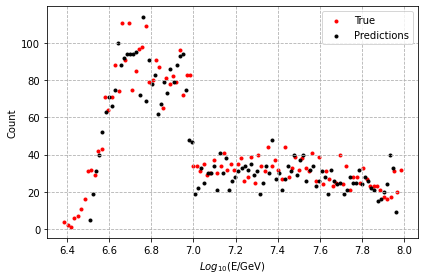

In [90]:
plt.scatter(hist1[1][0:-1],hist1[0],marker='.',color='r',label='True')
plt.scatter(hist2[1][0:-1],hist2[0],marker='.',color='black',label='Predictions')
plt.grid(True,linestyle='dashed')
plt.xlabel('$Log_{10}$(E/GeV)')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.savefig('Validation_energy.png')

/home/andy/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/andy/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/andy/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/andy/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/andy/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


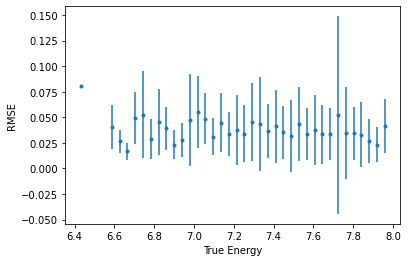

In [91]:
mean_list,mean_overall,std_mean,bins,median,ten,ninety,FWHM = binning2(np.array(energy)[X_validation[:,-1]!=0],np.array(error_energy)[X_validation[:,-1]!=0],bins=40)
rmse_new = [i**0.5 for i in mean_overall]
std_new = [(1/(2*mean))*sigma for mean,sigma in zip(rmse_new,std_mean)]
plt.errorbar(bins,rmse_new,yerr=std_new,fmt='.')
plt.xlabel('True Energy')
plt.ylabel('RMSE')
plt.savefig('Energy_waveformsonly.png')

In [92]:
mean_list,mean_overall,std_mean,bins,median,ten,ninety,FWHM = binning2(np.array(energy),np.array(error_energy),bins=40)

In [93]:
rmse_new = [i**0.5 for i in mean_overall]

In [94]:
std_new = [(1/(2*mean))*sigma for mean,sigma in zip(rmse_new,std_mean)]

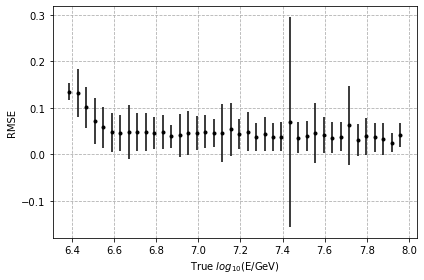

In [95]:
plt.errorbar(bins,rmse_new,yerr=std_new,fmt='.',color='black')
plt.xlabel('True $log_{10}$(E/GeV)')
plt.ylabel('RMSE')
plt.grid(True,linestyle='dashed')
plt.tight_layout()
plt.savefig('RMSE_Energy.png')

In [96]:
np.corrcoef(energy,energy_predictions)[0][1]

0.993187542137881

In [97]:
print(np.mean([(i-j)**2 for i,j in zip(energy,energy_predictions)])**0.5)

0.04776219829055712


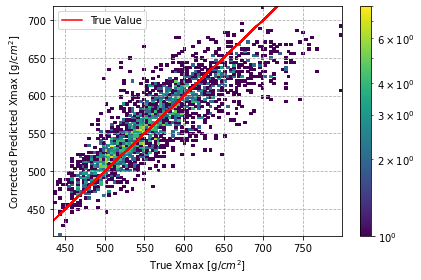

In [98]:
plt.hist2d(test_xmax,np.hstack(xmax_predictions2),bins=100,norm=matplotlib.colors.LogNorm())
plt.plot(test_xmax,test_xmax,color='r',label='True Value')
plt.xlabel('True Xmax [g/$cm^2$]')
plt.ylabel('Corrected Predicted Xmax [g/$cm^2$]')
plt.legend()
plt.colorbar()
plt.tight_layout()
plt.grid(True,linestyle='dashed')
plt.savefig('True_vs_predicted_after.png')

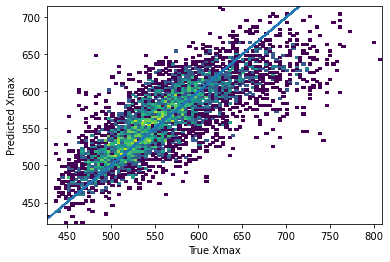

In [99]:
plt.hist2d(xmax,xmax_predictions,bins=100,norm=matplotlib.colors.LogNorm())
plt.plot(xmax,xmax)
plt.xlabel('True Xmax')
plt.ylabel('Predicted Xmax')
plt.show()

In [100]:
hist1 = np.histogram(xmax,bins=100)
hist2 = np.histogram(xmax_predictions,bins=hist1[1])

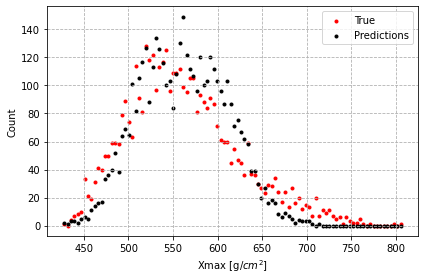

In [101]:
plt.scatter(hist1[1][0:-1],hist1[0],marker='.',color='r',label='True')
plt.scatter(hist2[1][0:-1],hist2[0],marker='.',color='black',label='Predictions')
plt.grid(True,linestyle='dashed')
plt.xlabel('Xmax [g/$cm^2$]')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.savefig('Validation_xmax.png')

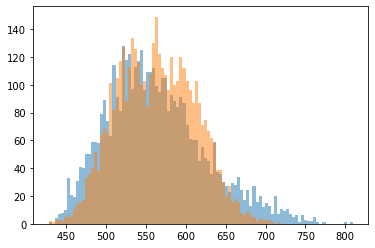

In [102]:
plt.hist(xmax,bins=100,alpha=0.5)
plt.hist(xmax_predictions,bins=hist1[1],alpha=0.5)
plt.show()

In [103]:
error_xmax = [(i-j)**2 for i,j in zip(test_xmax,xmax_predictions2)]

In [104]:
mean_list,mean_overall,std_mean,bins,median,ten,ninety,FWHM = binning2(np.array(test_xmax),np.array(error_xmax),bins=40)

/home/andy/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/andy/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/andy/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/andy/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/andy/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [105]:
rmse_new = [i**0.5 for i in mean_overall]
std_new = [(1/(2*mean))*sigma for mean,sigma in zip(rmse_new,std_mean)]

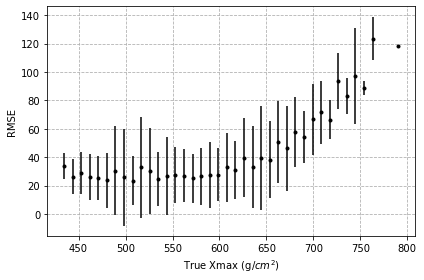

In [106]:
plt.errorbar(bins,rmse_new,yerr=std_new,fmt='.',color='black')
plt.xlabel('True Xmax (g/$cm^2$)')
plt.ylabel('RMSE')
plt.grid(True,linestyle='dashed')
plt.tight_layout()
plt.savefig('RMSE_Xmax.png')

In [107]:
np.sum(test_X[:,-1]!=0)/len(test_X)

0.2555139409071993

In [108]:
mean_list,mean_overall,std_mean,bins,median,ten,ninety,FWHM = binning2(np.array(test_xmax)[test_X[:,-1]!=0],np.array(error_xmax)[test_X[:,-1]!=0],bins=40)

In [109]:
rmse_new = [i**0.5 for i in mean_overall]
std_new = [(1/(2*mean))*sigma for mean,sigma in zip(rmse_new,std_mean)]

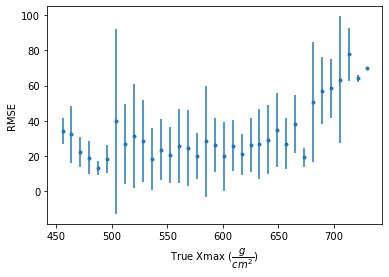

In [110]:
plt.errorbar(bins,rmse_new,yerr=std_new,fmt='.')
plt.xlabel('True Xmax ($\\dfrac{g}{cm^2})$')
plt.ylabel('RMSE')
plt.savefig('RMSE_linear_onlywaveforms.png')

In [111]:
np.corrcoef(xmax,xmax_predictions)[0][1]

0.7836352710286743

In [112]:
mean_list,mean_xmax,std_xmax,bins_xmax,median_xmax,ten_xmax,ninety_xmax,FWHM = binning2(xmax,xmax_predictions,20,confidence_interval=2)

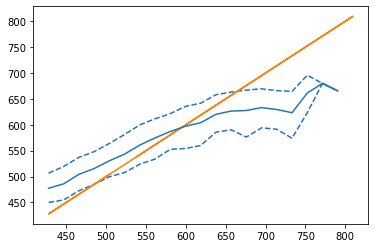

In [113]:
plot = plt.errorbar(bins_xmax,mean_xmax,label='proton')
color = plot[0].get_color()
plt.plot(bins_xmax,ten_xmax,linestyle='dashed',color=color)
plt.plot(bins_xmax,ninety_xmax,linestyle='dashed',color=color)
plt.plot(xmax,xmax)
plt.show()

In [114]:
mse = np.mean([(i-j)**2 for i,j in zip(xmax,xmax_predictions)])
print(mse**0.5)

38.401260451419546


In [115]:
mse

1474.6568042577587

# Checking Composition Plots

In [116]:
check = (energy_predictions>=0)

In [117]:
mass = mass[check]

In [118]:
energy = np.array(energy)

In [119]:
iron_energy = predictions2[mass==4]
proton_energy = predictions2[mass==1]
helium_energy = predictions2[mass==2]
oxygen_energy= predictions2[mass==3]

In [120]:
iron_xmax = np.array(xmax_predictions)[mass==4]
proton_xmax = np.array(xmax_predictions)[mass==1]
helium_xmax = np.array(xmax_predictions)[mass==2]
oxygen_xmax = np.array(xmax_predictions)[mass==3]

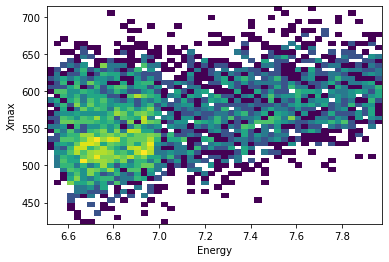

In [121]:
Xmax_predicted = xmax_predictions
check = (Xmax_predicted>400)&(Xmax_predicted<900)
plt.hist2d(predictions2[check],Xmax_predicted[check],bins=50,norm=matplotlib.colors.LogNorm())
plt.xlabel('Energy')
plt.ylabel('Xmax')
#plt.savefig('Xmax_energy_after.png')
plt.show()

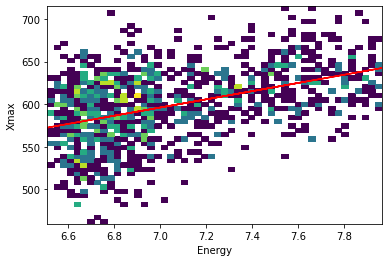

48.15985139320697 258.95604940736825


In [122]:
Xmax_predicted = proton_xmax
check_proton = (Xmax_predicted>400)&(Xmax_predicted<900)
fit_proton = curve_fit(line_function,proton_energy[check_proton],Xmax_predicted[check_proton])
output_xmax_proton = line_function(proton_energy[check_proton],fit_proton[0][0],fit_proton[0][1])

plt.hist2d(proton_energy[check_proton],Xmax_predicted[check_proton],bins=50,norm=matplotlib.colors.LogNorm())
plt.plot(proton_energy[check_proton],output_xmax_proton,color='red')
plt.xlabel('Energy')
plt.ylabel('Xmax')
#plt.savefig('Xmax_energy_after.png')
plt.show()

print(fit_proton[0][0],fit_proton[0][1])

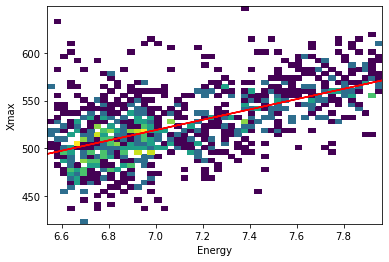

53.922977822077904 141.69867348566635


In [123]:
Xmax_predicted = iron_xmax
check_iron = (Xmax_predicted>400)&(Xmax_predicted<900)
fit_iron = curve_fit(line_function,iron_energy[check_iron],Xmax_predicted[check_iron])
output_xmax_iron = line_function(iron_energy[check_iron],fit_iron[0][0],fit_iron[0][1])

plt.hist2d(iron_energy[check_iron],Xmax_predicted[check_iron],bins=50,norm=matplotlib.colors.LogNorm())
plt.plot(iron_energy[check_iron],output_xmax_iron,color='red')
plt.xlabel('Energy')
plt.ylabel('Xmax')
#plt.savefig('Xmax_energy_after.png')
plt.show()

print(fit_iron[0][0],fit_iron[0][1])

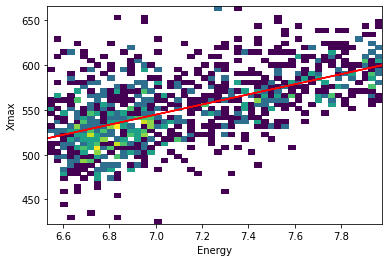

56.51607340609895 149.10792425053603


In [124]:
Xmax_predicted = oxygen_xmax
check_oxygen = (Xmax_predicted>400)&(Xmax_predicted<900)
fit = curve_fit(line_function,oxygen_energy[check_oxygen],Xmax_predicted[check_oxygen])
output_xmax_oxygen = line_function(oxygen_energy[check_oxygen],fit[0][0],fit[0][1])

plt.hist2d(oxygen_energy[check_oxygen],Xmax_predicted[check_oxygen],bins=50,norm=matplotlib.colors.LogNorm())
plt.plot(oxygen_energy[check_oxygen],output_xmax_oxygen,color='red')
plt.xlabel('Energy')
plt.ylabel('Xmax')
#plt.savefig('Xmax_energy_after.png')
plt.show()

print(fit[0][0],fit[0][1])

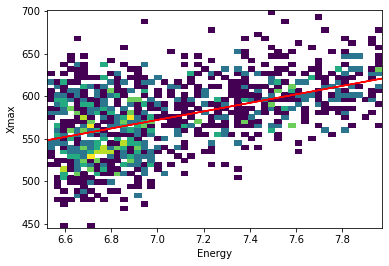

50.05566559066481 221.71854388746297


In [125]:
Xmax_predicted = helium_xmax
check_helium = (Xmax_predicted>400)&(Xmax_predicted<900)
fit = curve_fit(line_function,helium_energy[check_helium],Xmax_predicted[check_helium])
output_xmax_helium = line_function(helium_energy[check_helium],fit[0][0],fit[0][1])

plt.hist2d(helium_energy[check_helium],Xmax_predicted[check_helium],bins=50,norm=matplotlib.colors.LogNorm())
plt.plot(helium_energy[check_helium],output_xmax_helium,color='red')
plt.xlabel('Energy')
plt.ylabel('Xmax')
#plt.savefig('Xmax_energy_after.png')
plt.show()

print(fit[0][0],fit[0][1])

In [126]:
plot = False
bins = 10
mean_list_proton,mean_proton,std_proton,bins_proton,median_proton,ten_proton,ninety_proton,FWHM = binning2(proton_energy,proton_xmax,bins)
mean_list_iron,mean_iron,std_iron,bins_iron,median_iron,ten_iron,ninety_iron,FWHM = binning2(iron_energy,iron_xmax,bins,bins_input=list(bins_proton))
mean_list_oxygen,mean_oxygen,std_oxygen,bins_oxygen,median_oxygen,ten_oxygen,ninety_oxygen,FWHM = binning2(oxygen_energy,oxygen_xmax,bins,bins_input=bins_proton)
mean_list_helium,mean_helium,std_helium,bins_helium,median_helium,ten_helium,ninety_helium,FWHM = binning2(helium_energy,helium_xmax,bins,bins_input=bins_proton)

In [127]:
len(proton_energy)

1124

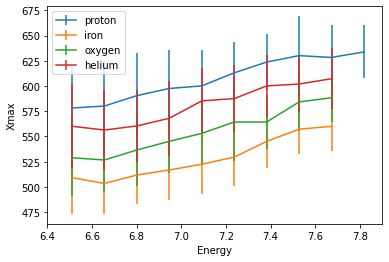

In [128]:
plt.errorbar(bins_proton,mean_proton,yerr=std_proton,label='proton')
plt.errorbar(bins_iron,mean_iron,yerr=std_iron,label='iron')
plt.errorbar(bins_oxygen,mean_oxygen,yerr=std_oxygen,label='oxygen')
plt.errorbar(bins_helium,mean_helium,yerr=std_helium,label='helium')
plt.legend()
plt.xlabel('Energy')
plt.ylabel('Xmax')
plt.xlim(6.4,7.9)
plt.savefig('All_species_energy_xmax.png')
#plt.show()

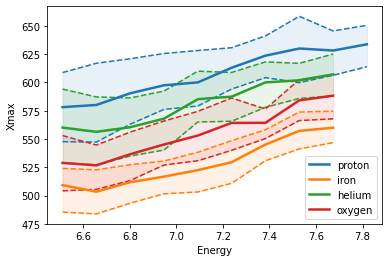

In [129]:
plot = plt.errorbar(bins_proton,mean_proton,label='proton',linewidth=2.5)
color = plot[0].get_color()
plt.plot(bins_proton,ten_proton,linestyle='dashed',color=color)
plt.plot(bins_proton,ninety_proton,linestyle='dashed',color=color)
plt.fill_between(bins_proton,(ten_proton),(ninety_proton),alpha=0.1,color=color)

plot = plt.errorbar(bins_iron,mean_iron,label='iron',linewidth=2.5)
color = plot[0].get_color()
plt.plot(bins_iron,ten_iron,linestyle='dashed',color=color)
plt.plot(bins_iron,ninety_iron,linestyle='dashed',color=color)
plt.fill_between(bins_iron,(ten_iron),(ninety_iron),alpha=0.1,color=color)

plot = plt.errorbar(bins_helium,mean_helium,label='helium',linewidth=2.5)
color = plot[0].get_color()
plt.plot(bins_helium,ten_helium,linestyle='dashed',color=color)
plt.plot(bins_helium,ninety_helium,linestyle='dashed',color=color)
plt.fill_between(bins_helium,(ten_helium),(ninety_helium),alpha=0.1,color=color)

plot = plt.errorbar(bins_oxygen,mean_oxygen,label='oxygen',linewidth=2.5)
color = plot[0].get_color()
plt.plot(bins_oxygen,ten_oxygen,linestyle='dashed',color=color)
plt.plot(bins_oxygen,ninety_oxygen,linestyle='dashed',color=color)
plt.fill_between(bins_oxygen,(ten_oxygen),(ninety_oxygen),alpha=0.1,color=color)

plt.legend()
plt.xlabel('Energy')
plt.ylabel('Xmax')
plt.savefig('New_plot.png')

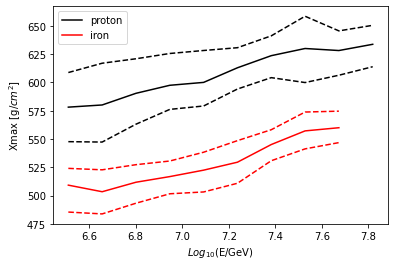

In [130]:
plot = plt.errorbar(bins_proton,mean_proton,label='proton',color='black')
color = plot[0].get_color()
plt.plot(bins_proton,ten_proton,linestyle='dashed',color=color)
plt.plot(bins_proton,ninety_proton,linestyle='dashed',color=color)

plot = plt.errorbar(bins_iron,mean_iron,label='iron',color='red')
color = plot[0].get_color()
plt.plot(bins_iron,ten_iron,linestyle='dashed',color=color)
plt.plot(bins_iron,ninety_iron,linestyle='dashed',color=color)

#plt.scatter(bins_data,mean_data)
plt.legend()
plt.xlabel('$Log_{10}$(E/GeV)')
plt.ylabel('Xmax [g/$cm^2$]')
#plt.savefig('Proton_vs_Iron.png')
plt.savefig('Proton_vs_Iron.png')

In [131]:
#mean_data,std_data,bins_data,median_data,ten_data,ninety_data = binning(energy,xmax_data_corrected,bins=20)

In [132]:
matplotlib.rcParams.update({'font.size': 14})

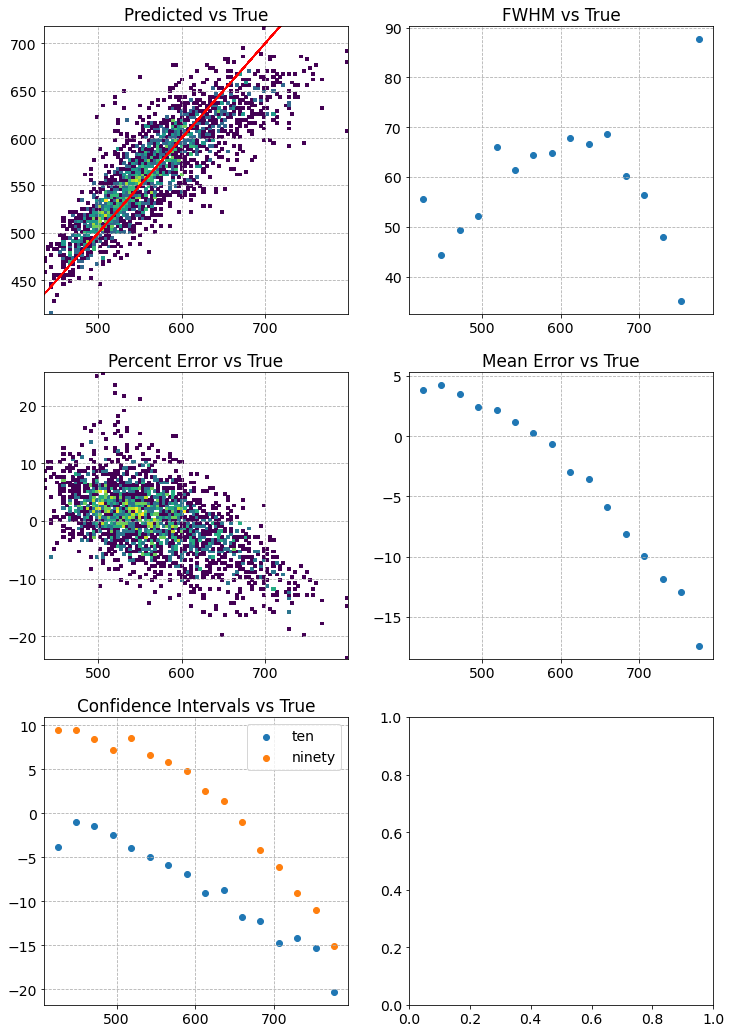

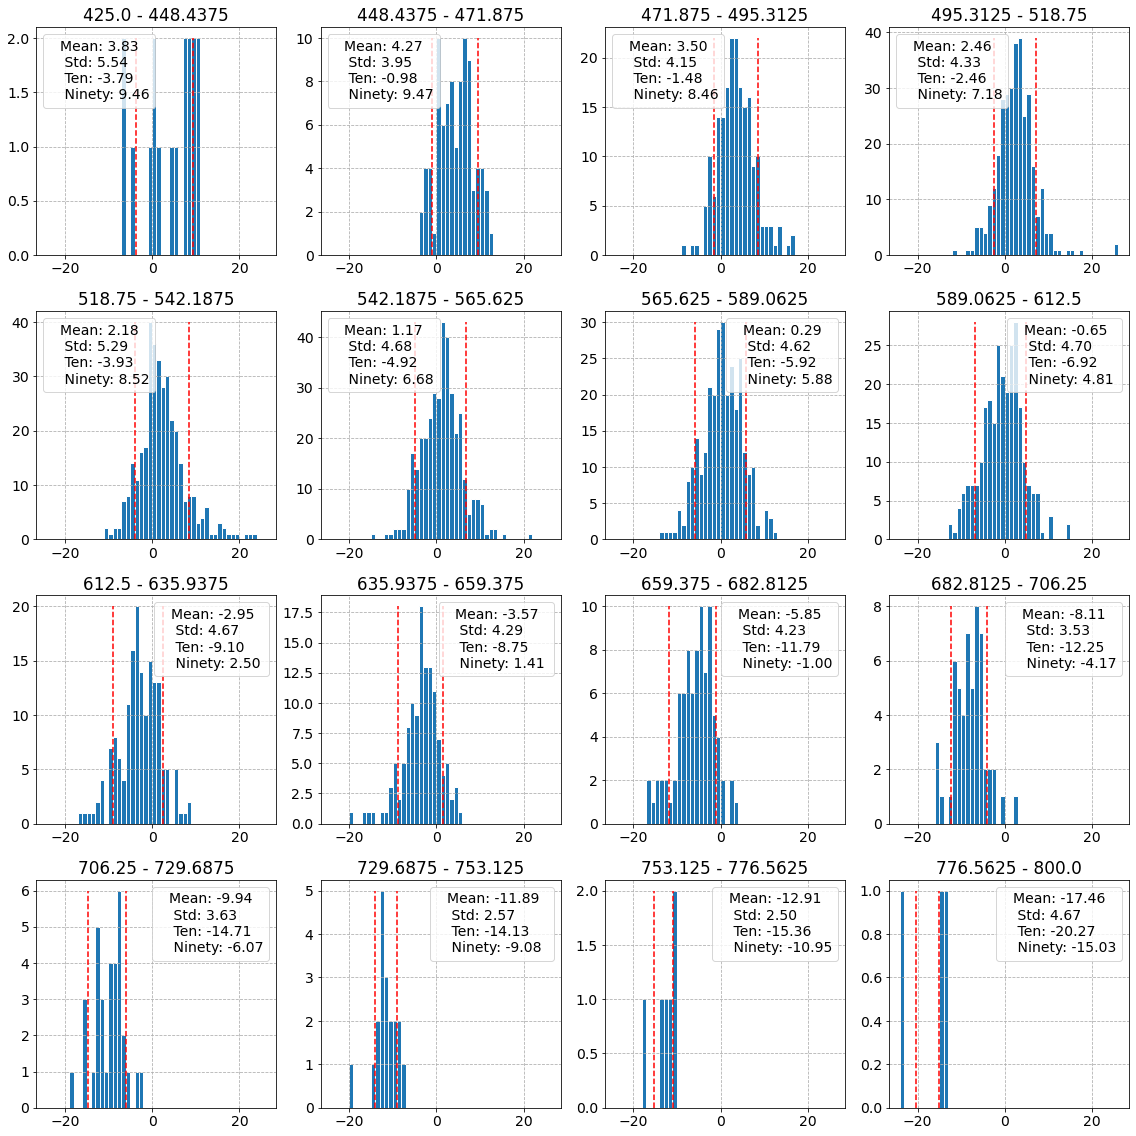

In [133]:
plot_function(test_xmax,np.hstack(xmax_predictions2),425,800,50,16,'Xmax')

In [134]:
print(len(energy))

4326


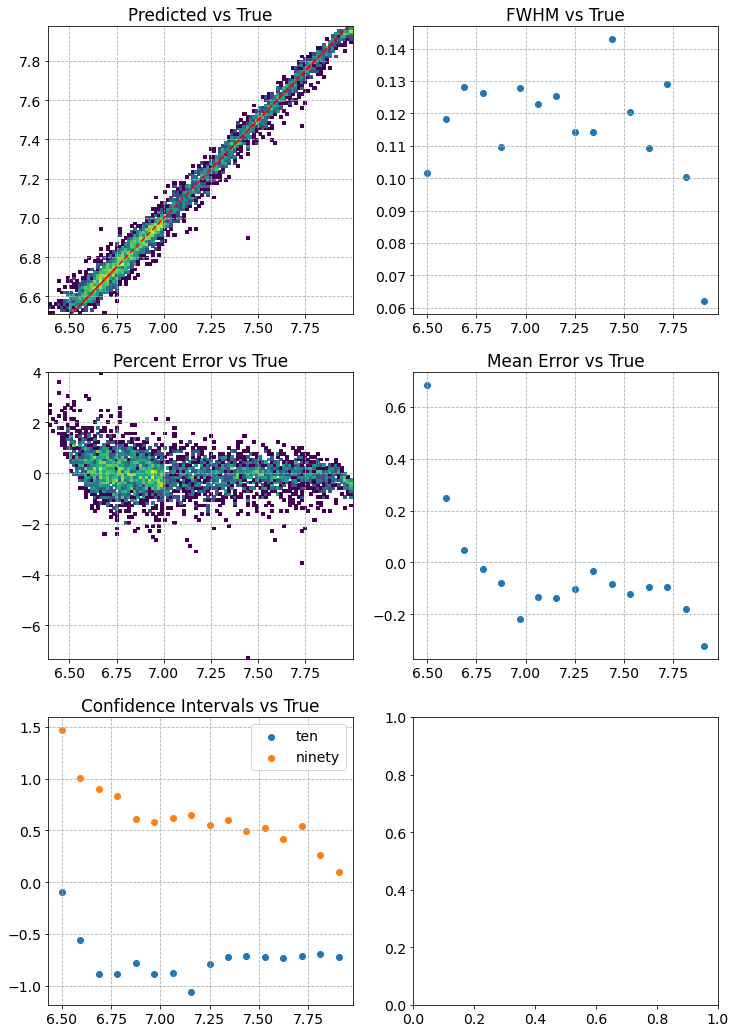

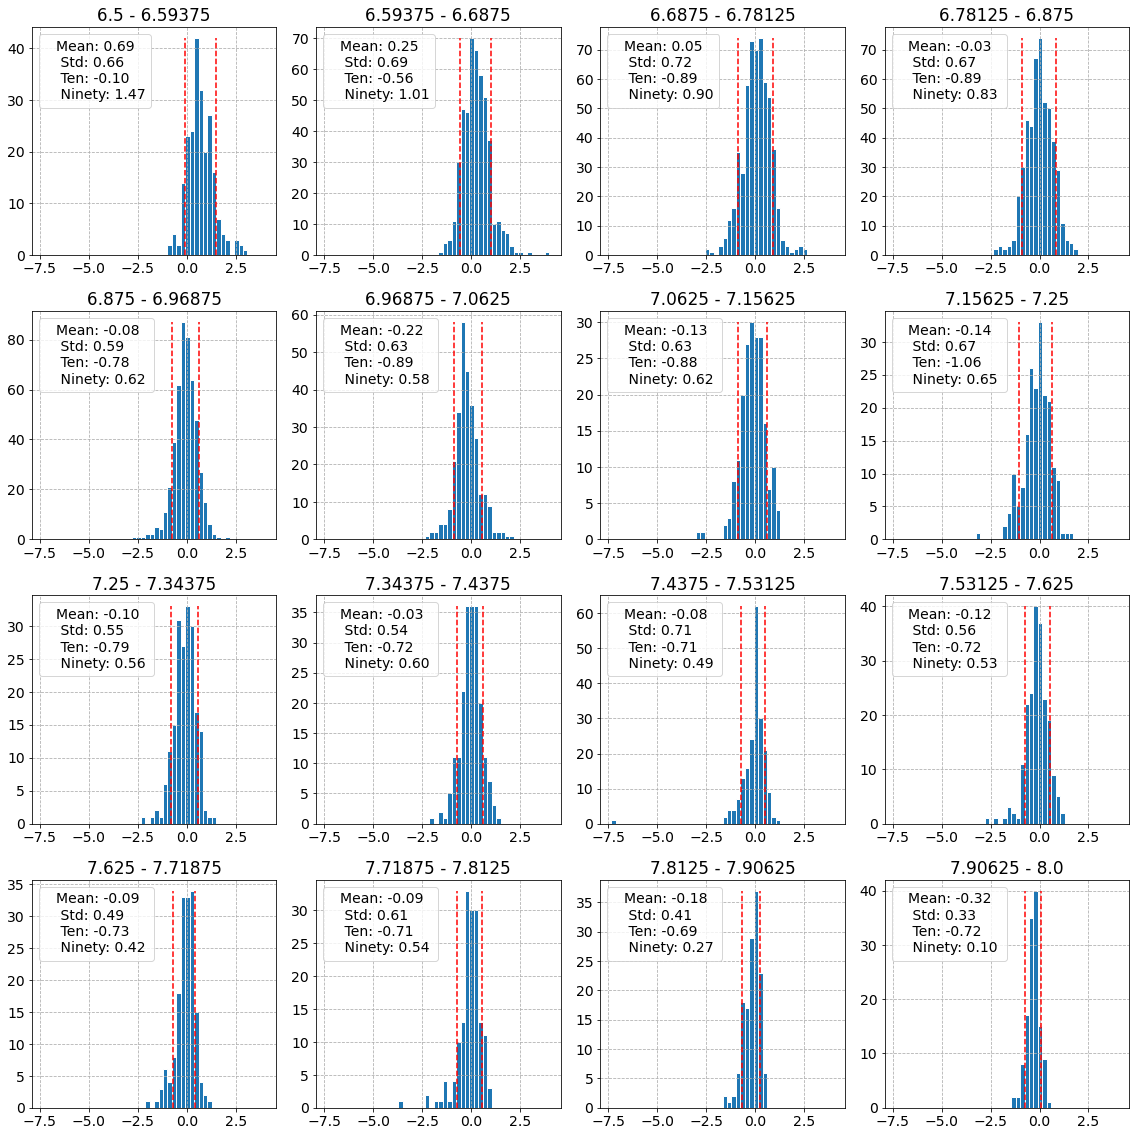

In [135]:
plot_function(energy,energy_predictions,6.5,8,50,16,'Energy')

In [136]:
mass_check = np.array(list(zip(*y_validation))[2])
mass_check2 = np.array(list(zip(*test_y))[2])

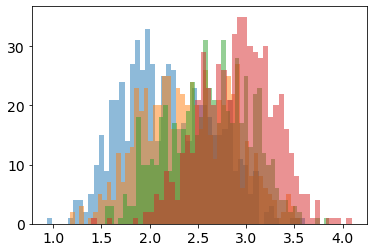

In [137]:
plt.hist(mass_predictions2[mass_check2==1],bins=50,alpha=0.5)
plt.hist(mass_predictions2[mass_check2==2],bins=50,alpha=0.5)
plt.hist(mass_predictions2[mass_check2==3],bins=50,alpha=0.5)
plt.hist(mass_predictions2[mass_check2==4],bins=50,alpha=0.5)
plt.show()

In [138]:
import seaborn as sns
from seaborn import kdeplot

In [139]:
energy_true = list(zip(*test_y))[0]
energy_bins = np.linspace(6.5,8,7)

In [140]:
xmax_true = np.array(list(zip(*test_y))[1])

In [141]:
mass_predictor =BaggingRegressor(DecisionTreeRegressor(splitter='best',random_state=42),random_state=42)

In [142]:
mass_predictor.fit(X_train1,y_train[:,-1],sample_weight=weight)

BaggingRegressor(base_estimator=DecisionTreeRegressor(random_state=42),
                 random_state=42)

In [143]:
joblib.dump(mass_predictor,'mass_model.pkl')

['mass_model.pkl']

In [144]:
mass_predictions = mass_predictor.predict(X_validation)

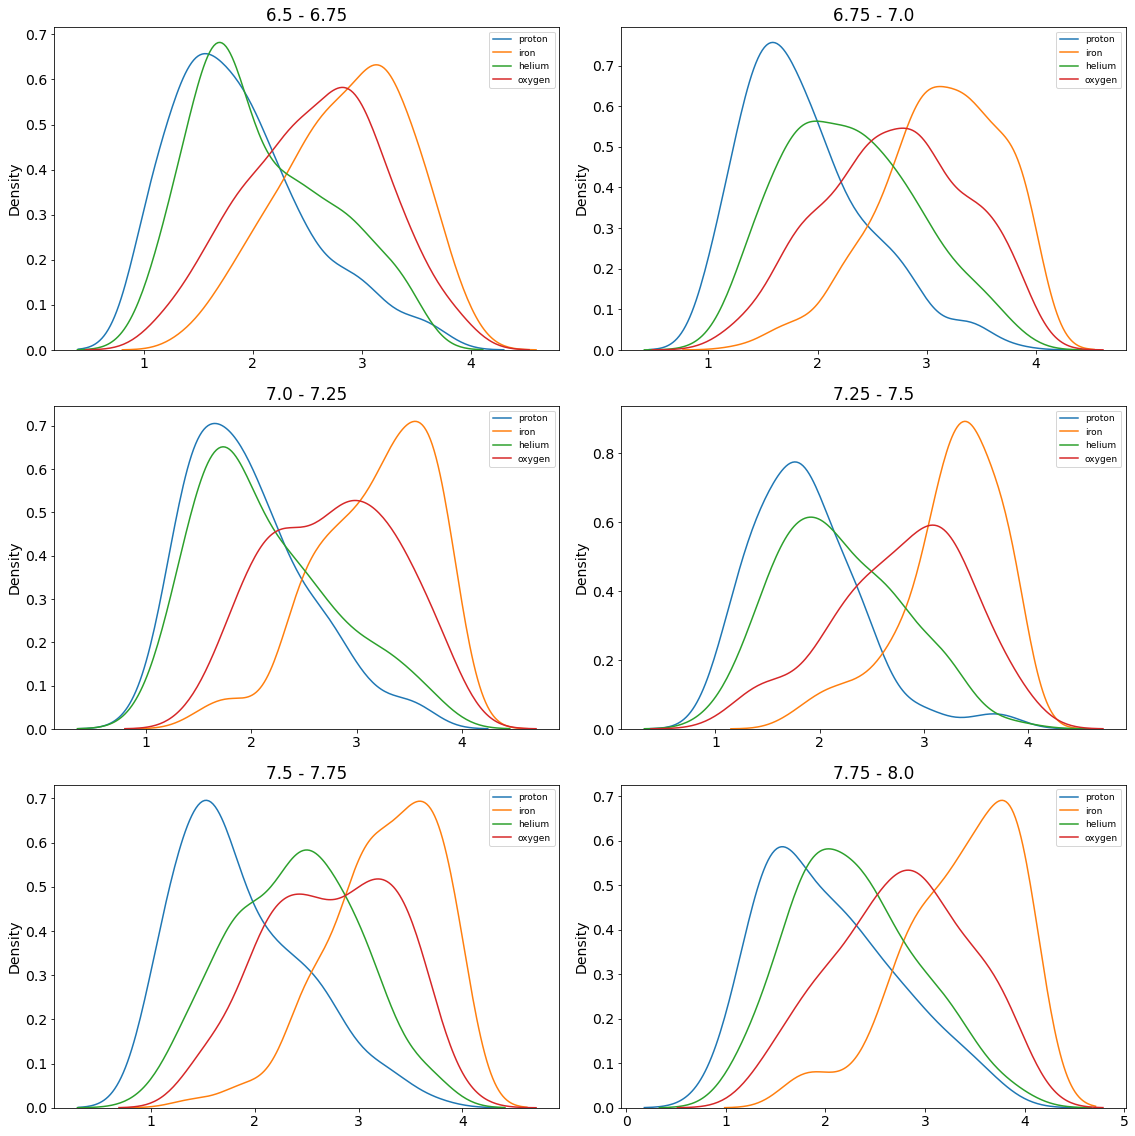

In [145]:
fig, axs = plt.subplots(3,2,figsize=(16,16))
count = 0
for k in range(3):
    for m in range(2):
        energy_check = []
        for j in energy:
            if (j>energy_bins[count])&(j<energy_bins[count+1]):
                energy_check.append(True)
            else:
                energy_check.append(False)
        kdeplot(mass_predictions[(mass_check==1)&(energy_check)],label='proton',ax=axs[k][m])
        kdeplot(mass_predictions[(mass_check==4)&(energy_check)],label='iron',ax=axs[k][m])
        kdeplot(mass_predictions[(mass_check==2)&(energy_check)],label='helium',ax=axs[k][m])
        kdeplot(mass_predictions[(mass_check==3)&(energy_check)],label='oxygen',ax=axs[k][m])
        axs[k][m].set_title('%s - %s'%(energy_bins[count],energy_bins[count+1]))
        axs[k][m].legend(prop={'size':9})
        count+=1
plt.tight_layout()
plt.savefig('kde_wo_mass.png')

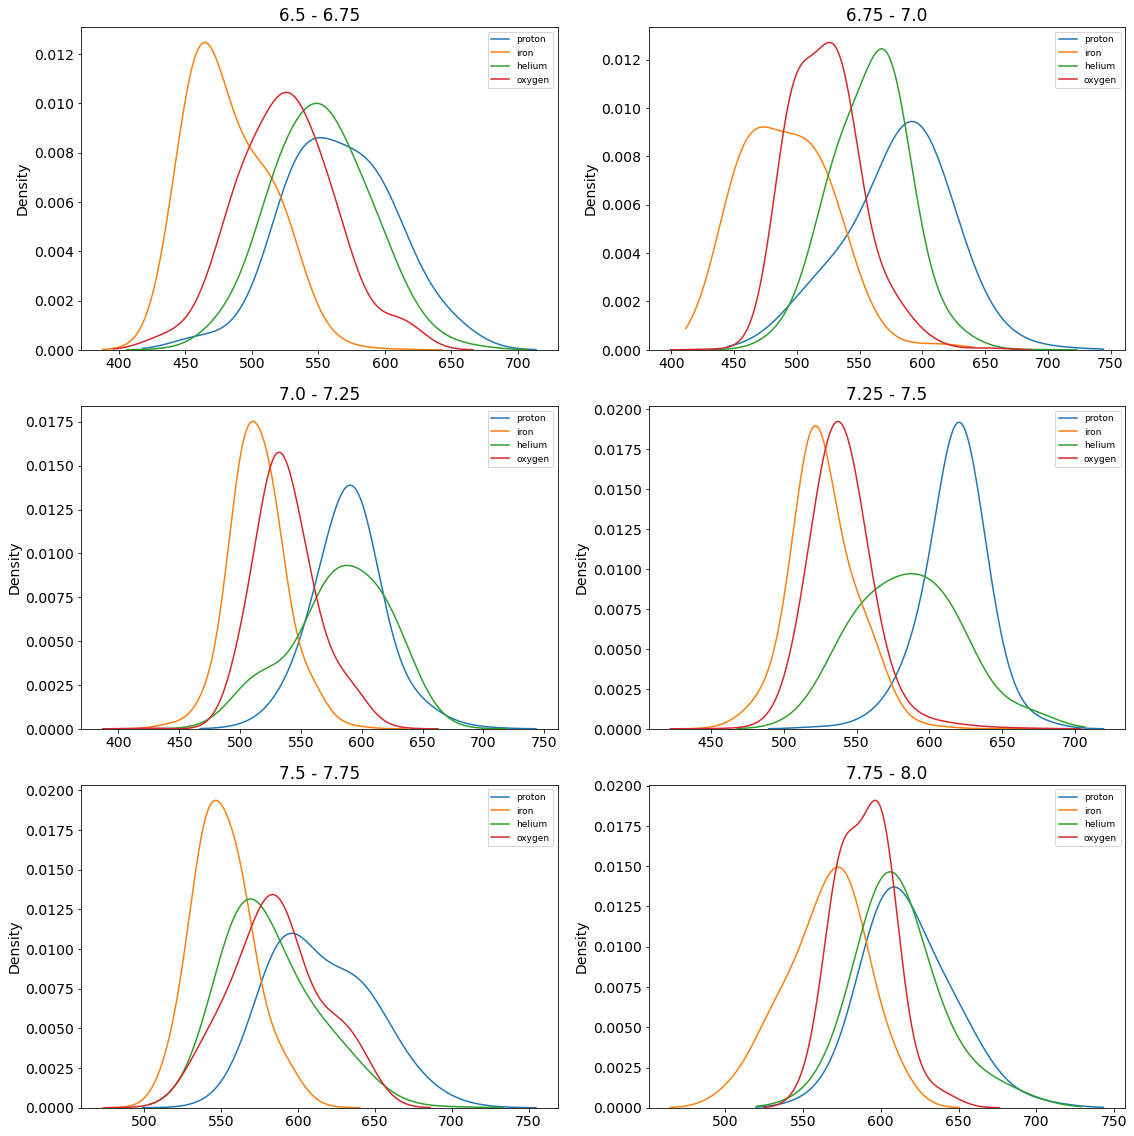

In [146]:
fig, axs = plt.subplots(3,2,figsize=(16,16))
count = 0
for k in range(3):
    for m in range(2):
        energy_check = []
        for j in energy:
            if (j>energy_bins[count])&(j<energy_bins[count+1]):
                energy_check.append(True)
            else:
                energy_check.append(False)
        weights = np.array([1/abs(i-j) for i,j in zip(xmax_predictions,y_validation[:,1])])
        kdeplot(xmax_predictions[(mass_check==1)&(energy_check)],label='proton',ax=axs[k][m],weights = weights[(mass_check==1)&(energy_check)])
        kdeplot(xmax_predictions[(mass_check==4)&(energy_check)],label='iron',ax=axs[k][m],weights = weights[(mass_check==4)&(energy_check)])
        kdeplot(xmax_predictions[(mass_check==2)&(energy_check)],label='helium',ax=axs[k][m],weights = weights[(mass_check==2)&(energy_check)])
        kdeplot(xmax_predictions[(mass_check==3)&(energy_check)],label='oxygen',ax=axs[k][m],weights = weights[(mass_check==3)&(energy_check)])
        axs[k][m].set_title('%s - %s'%(energy_bins[count],energy_bins[count+1]))
        axs[k][m].legend(prop={'size':9})
        count+=1
plt.tight_layout()


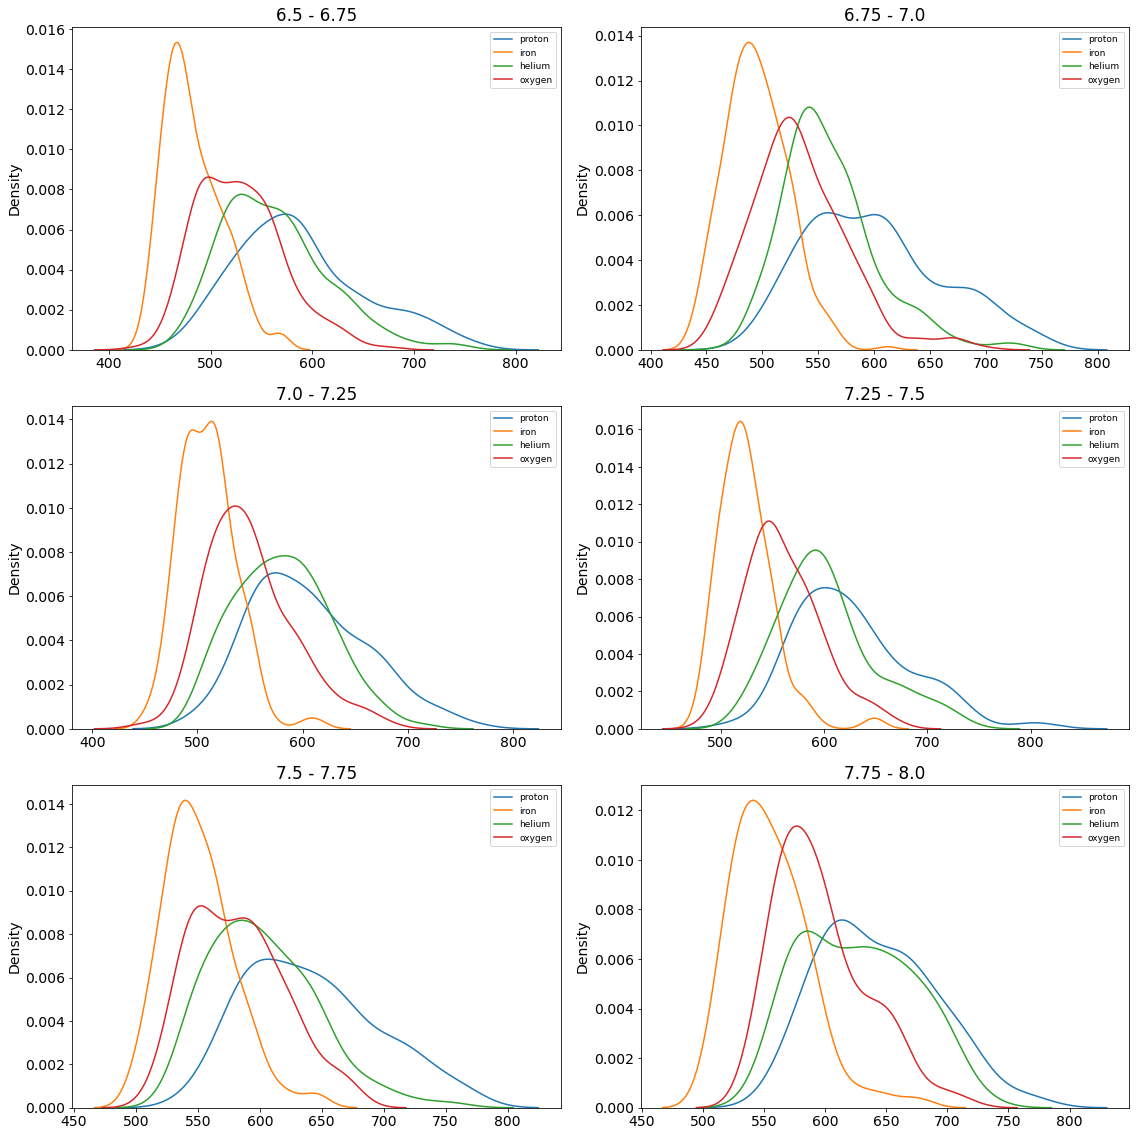

In [147]:
fig, axs = plt.subplots(3,2,figsize=(16,16))
count = 0
for k in range(3):
    for m in range(2):
        energy_check = []
        for j in energy:
            if (j>energy_bins[count])&(j<energy_bins[count+1]):
                energy_check.append(True)
            else:
                energy_check.append(False)
        kdeplot(xmax[(mass_check==1)&(energy_check)],label='proton',ax=axs[k][m])
        kdeplot(xmax[(mass_check==4)&(energy_check)],label='iron',ax=axs[k][m])
        kdeplot(xmax[(mass_check==2)&(energy_check)],label='helium',ax=axs[k][m])
        kdeplot(xmax[(mass_check==3)&(energy_check)],label='oxygen',ax=axs[k][m])
        axs[k][m].set_title('%s - %s'%(energy_bins[count],energy_bins[count+1]))
        axs[k][m].legend(prop={'size':9})
        count+=1
plt.tight_layout()
plt.savefig('Xmax_true_kde_wo_mass.png')

In [148]:
import scipy
import matplotlib.patches as mpatches

In [149]:
def lnA_func(a,b,c,d):
    return 1 * a + 2 * b + 3 * c + 4 * d

In [154]:
data_predict = best_model.predict(X_data[:])
xmax_data = np.array(list(zip(*data_predict))[1])
bias_data = line_model.predict(xmax_data.reshape(-1,1))
energy_data = tree.predict(X_data[:])
xmax_data_corrected = [i-j for i,j in zip(xmax_data,bias_data)]

In [155]:
mass_data = mass_predictor.predict(X_data)

In [156]:
from scipy.stats import chisquare

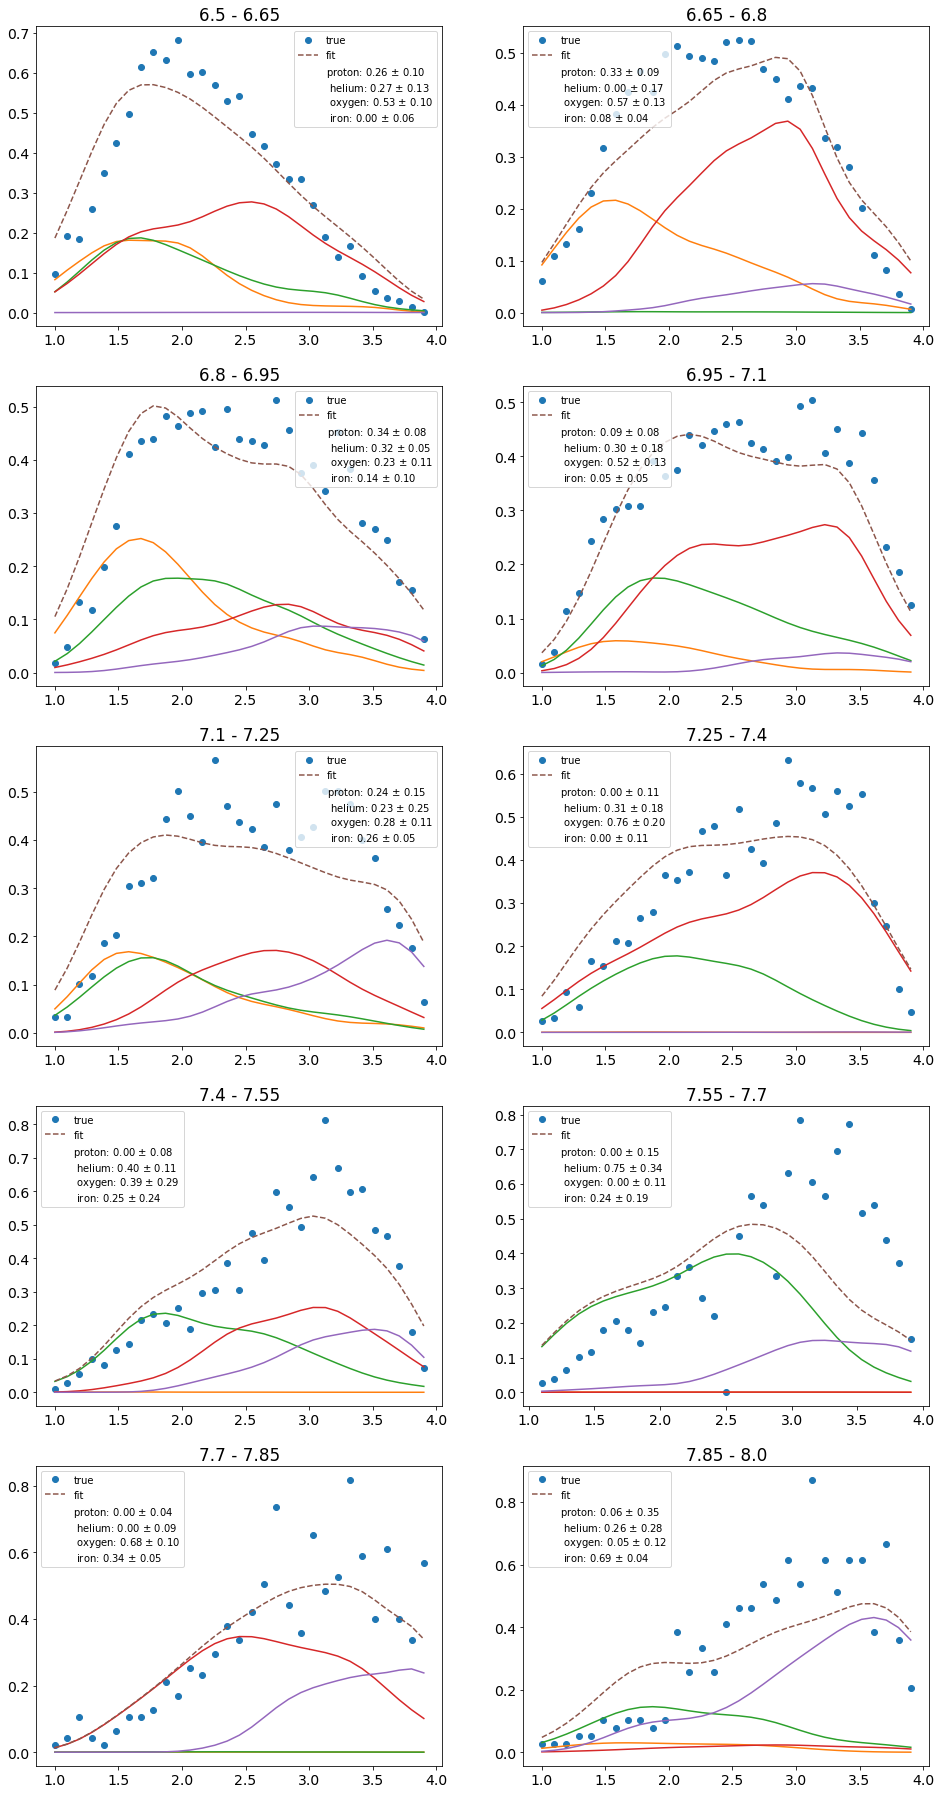

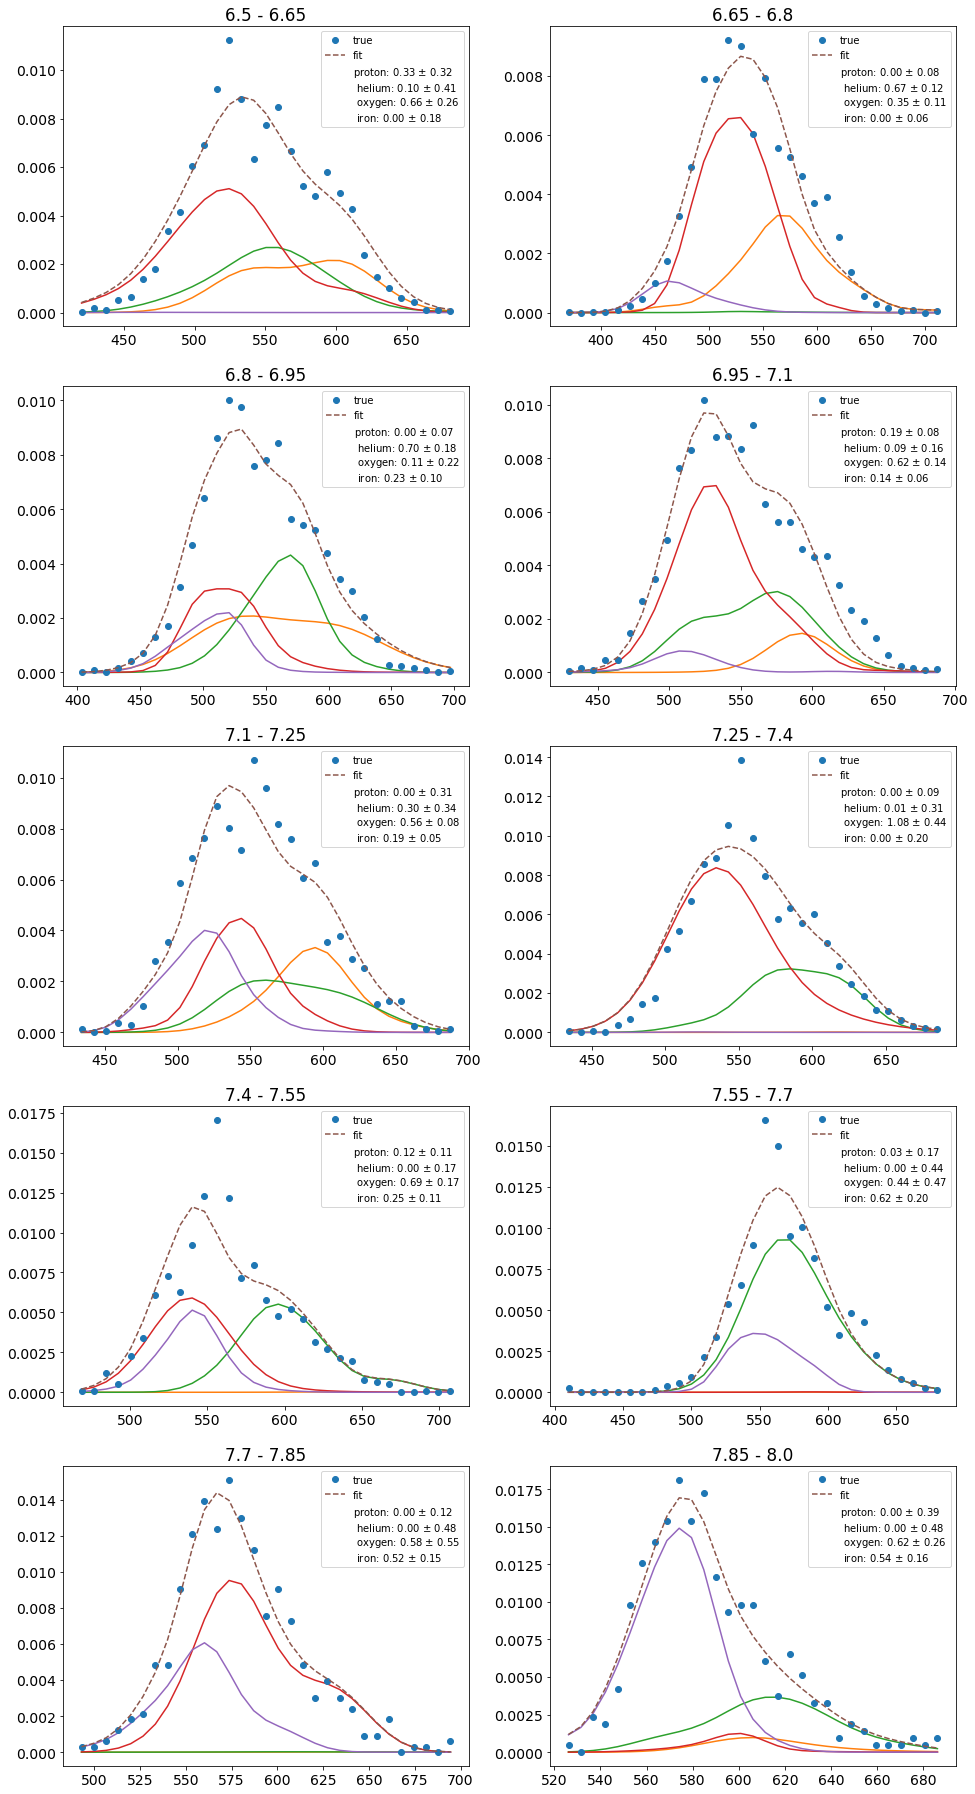

In [157]:
energy_bins = np.linspace(6.5,8,11)
fig, axs = plt.subplots(5,2,figsize=(16,16*2))
fig, axs2 = plt.subplots(5,2,figsize=(16,16*2))
count = 0

proton = []
iron = []
helium = []
oxygen = []
lnA = []

for m in range(5):
    for k in range(2):
        energy_check = []
        energy_check2 = []
        for j in energy_predictions:
            if (j>energy_bins[count])&(j<energy_bins[count+1]):
                energy_check.append(True)
            else:
                energy_check.append(False)

        for j in energy_data:
            if (j>energy_bins[count])&(j<energy_bins[count+1]):
                energy_check2.append(True)
            else:
                energy_check2.append(False) 
        
        energy_check = np.array(energy_check)
        energy_check2 = np.array(energy_check2)
        xmax_data_corrected = np.array(xmax_data_corrected)
        
        
        lnA_list = []
        proton_list = []
        iron_list = []
        helium_list = []
        oxygen_list = []
        
        check_proton = (mass==1)&(energy_check)
        check_helium = (mass==2)&(energy_check)
        check_oxygen = (mass==3)&(energy_check)
        check_iron = (mass==4)&(energy_check)
        
        weights = np.array([1/abs(i-j) for i,j in zip(xmax_predictions,y_validation[:,1])])
        
        kde_proton = scipy.stats.gaussian_kde(xmax_predictions[check_proton],weights = weights[check_proton])

        kde_helium= scipy.stats.gaussian_kde(xmax_predictions[check_helium],weights=weights[check_helium])

        kde_oxygen = scipy.stats.gaussian_kde(xmax_predictions[check_oxygen],weights=weights[check_oxygen])

        kde_iron = scipy.stats.gaussian_kde(xmax_predictions[check_iron],weights=weights[check_iron])
            
        kde_proton_mass = scipy.stats.gaussian_kde(mass_predictions[check_proton])

        kde_helium_mass= scipy.stats.gaussian_kde(mass_predictions[check_helium])

        kde_oxygen_mass = scipy.stats.gaussian_kde(mass_predictions[check_oxygen])

        kde_iron_mass = scipy.stats.gaussian_kde(mass_predictions[check_iron])
            
        def my_function(x,a,b,c,d):
            y1 = kde_proton.evaluate(x)
            y2 = kde_helium.evaluate(x)
            y3 = kde_oxygen.evaluate(x)
            y4 = kde_iron.evaluate(x)
            y = a * y1 + b * y2 + c * y3 + d * y4
            return y
        
        def my_function2(x,a,b,c,d):
            y1 = kde_proton_mass.evaluate(x) 
            y2 = kde_helium_mass.evaluate(x) 
            y3 = kde_oxygen_mass.evaluate(x)
            y4 = kde_iron_mass.evaluate(x)
            y = a * y1 + b * y2 + c * y3 + d * y4
            return y
            
        hist = np.histogram(xmax_data_corrected[energy_check2],bins=31,density=True)
        hist2 = np.histogram(mass_data[energy_check2],bins=31,density=True)

        fit = curve_fit(my_function,hist[1][0:-1],hist[0],bounds = (1e-3,np.inf))
        fit2 = curve_fit(my_function2,hist2[1][0:-1],hist2[0],bounds = (1e-3,np.inf))
        
        #proton_frac = (fit[0][0]/fit[1][0][0]**0.5 + fit2[0][0]/fit2[1][0][0]**0.5)/(1/fit[1][0][0]**0.5 + 1/fit2[1][0][0]**0.5)
        #helium_frac = (fit[0][1]/fit[1][1][1]**0.5 + fit2[0][1]/fit2[1][1][1]**0.5)/(1/fit[1][1][1]**0.5 + 1/fit2[1][1][1]**0.5)
        #oxygen_frac = (fit[0][2]/fit[1][2][2]**0.5 + fit2[0][2]/fit2[1][2][2]**0.5)/(1/fit[1][2][2]**0.5 + 1/fit2[1][2][2]**0.5)
        #iron_frac = (fit[0][3]/fit[1][3][3]**0.5 + fit2[0][3]/fit2[1][3][3]**0.5)/(1/fit[1][3][3]**0.5 + 1/fit2[1][3][3]**0.5)
        
        proton_frac = fit[0][0]
        helium_frac = fit[0][1]
        oxygen_frac = fit[0][2]
        iron_frac = fit[0][3]
        
        plot1 =axs[m][k].errorbar(hist2[1][0:-1],hist2[0],label = 'true',fmt='o')
        axs[m][k].errorbar(hist2[1][0:-1],proton_frac * kde_proton_mass(hist2[1][0:-1]))
        axs[m][k].errorbar(hist2[1][0:-1],helium_frac * kde_helium_mass(hist2[1][0:-1]))
        axs[m][k].errorbar(hist2[1][0:-1],oxygen_frac * kde_oxygen_mass(hist2[1][0:-1]))
        axs[m][k].errorbar(hist2[1][0:-1],iron_frac * kde_iron_mass(hist2[1][0:-1]))
        plot2 = axs[m][k].errorbar(hist2[1][0:-1],my_function2(hist2[1][0:-1],proton_frac,helium_frac,oxygen_frac,iron_frac),label='fit',fmt='--')
        axs[m][k].set_title('%s - %s'%(energy_bins[count],energy_bins[count+1]))
        red_patch = mpatches.Patch(color='white', label='proton: %.2f $\\pm$ %.2f\n helium: %.2f $\\pm$ %.2f\n oxygen: %.2f $\\pm$ %.2f\n iron: %.2f $\\pm$ %.2f'%(fit[0][0],fit[1][0][0]**0.5,fit[0][1],fit[1][1][1]**0.5,fit[0][2],fit[1][2][2]**0.5,fit[0][3],fit[1][3][3]**0.5))
        axs[m][k].legend(handles = [plot1,plot2,red_patch],prop={'size':10})
        
        plot1 =axs2[m][k].errorbar(hist[1][0:-1],hist[0],label = 'true',fmt='o')
        axs2[m][k].plot(hist[1][0:-1],proton_frac * kde_proton(hist[1][0:-1]))
        axs2[m][k].plot(hist[1][0:-1],helium_frac * kde_helium(hist[1][0:-1]))
        axs2[m][k].plot(hist[1][0:-1],oxygen_frac * kde_oxygen(hist[1][0:-1]))
        axs2[m][k].plot(hist[1][0:-1],iron_frac * kde_iron(hist[1][0:-1]))
        plot2 = axs2[m][k].errorbar(hist[1][0:-1],my_function(hist[1][0:-1],proton_frac,helium_frac,oxygen_frac,iron_frac),label='fit',fmt='--')
        axs2[m][k].set_title('%s - %s'%(energy_bins[count],energy_bins[count+1]))
        red_patch = mpatches.Patch(color='white', label='proton: %.2f $\\pm$ %.2f\n helium: %.2f $\\pm$ %.2f\n oxygen: %.2f $\\pm$ %.2f\n iron: %.2f $\\pm$ %.2f'%(fit2[0][0],fit2[1][0][0]**0.5,fit2[0][1],fit2[1][1][1]**0.5,fit2[0][2],fit2[1][2][2]**0.5,fit2[0][3],fit2[1][3][3]**0.5))
        axs2[m][k].legend(handles = [plot1,plot2,red_patch],prop={'size':10})

        
        lnA.append(lnA_func(proton_frac,helium_frac,oxygen_frac,iron_frac))
        proton.append(proton_frac)
        iron.append(iron_frac)
        helium.append(helium_frac)
        oxygen.append(oxygen_frac)
        
        count += 1
        
#plt.savefig('kde_fit.png')
plt.show()

In [158]:
energy_values = [(energy_bins[i] + energy_bins[i+1])/2 for i in range(len(energy_bins)-1)]

In [159]:
iron_validation2 = cut_values(y_validation[:,0],mass=y_validation[:,-1],mass_value=4)
proton_validation2 = cut_values(y_validation[:,0],mass=y_validation[:,-1],mass_value=1)
helium_validation2 = cut_values(y_validation[:,0],mass=y_validation[:,-1],mass_value=2)
oxygen_validation2 = cut_values(y_validation[:,0],mass=y_validation[:,-1],mass_value=3)

In [160]:
count_dict = {'energy':np.linspace(6.5,8,11)[0:-1],
             'iron_total':iron_cut1,
             'helium_total':helium_cut1,
             'proton_total':proton_cut1,
             'oxygen_total':oxygen_cut1,
              'iron_cut1':iron_cut2,
             'helium_cut1':helium_cut2,
             'proton_cut1':proton_cut2,
             'oxygen_cut1':oxygen_cut2,
              'iron_train':iron_train,
             'helium_train':helium_train,
             'proton_train':proton_train,
             'oxygen_train':oxygen_train,
              'iron_validation':iron_validation,
             'helium_validation':helium_validation,
             'proton_validation':proton_validation,
             'oxygen_validation':oxygen_validation,
              'iron_test':iron_test,
             'helium_test':helium_test,
             'proton_test':proton_test,
             'oxygen_test':oxygen_test,
              'iron_final':iron_validation2,
             'helium_final':helium_validation2,
             'proton_final':proton_validation2,
             'oxygen_final':oxygen_validation2
             }

In [161]:
df_count = pd.DataFrame(count_dict)

In [162]:
df_count.head(10)

energy  iron_total  helium_total  proton_total  oxygen_total  iron_cut1  \
0    6.50        2073          2193          2157          1920        528   
1    6.65        2038          2474          2229          2432       1010   
2    6.80        2198          2188          2159          2086       1153   
3    6.95        1366          1266          1382          1384        723   
4    7.10         846           912           956           872        432   
5    7.25         878           945           906          1042        396   
6    7.40         952           904           825           950        403   
7    7.55        1014           925           995          1046        410   
8    7.70         997           980           969          1002        366   
9    7.85        1014           934          1097           965        291   

   helium_cut1  proton_cut1  oxygen_cut1  iron_train  ...  proton_validation  \
0          782          810          566         380  ...                148   
1         1274         1213         1257         752  ...                240   
2         1146         1093         1090         837  ...                187   
3          618          688          705         541  ...                118   
4          422          481          407         317  ...                 90   
5          456          411          479         269  ...                 70   
6          381          353          448         287  ...                 67   
7          340          374          440         287  ...                 74   
8          354          285          351         273  ...                 64   
9          245          301          311         199  ...                 49   

   oxygen_validation  iron_test  helium_test  proton_test  oxygen_test  \
0                 97         48           84           84           49   
1                227         88          128          119          123   
2                187        121          107          125          111   
3                114         61           61           74           61   
4                 79         40           47           43           37   
5                 82         45           48           32           47   
6                 93         37           39           33           42   
7                 78         53           33           39           42   
8                 63         37           48           26           32   
9                 69         44           25           33           38   

   iron_final  helium_final  proton_final  oxygen_final  
0         100           148           148            97  
1         170           232           240           227  
2         195           198           187           187  
3         121            99           118           114  
4          75            71            90            79  
5          82            84            70            82  
6          79            81            67            93  
7          70            61            74            78  
8          56            68            64            63  
9          48            45            49            69  

[10 rows x 25 columns]

In [163]:
df_count.to_csv('cut_values.csv')

In [164]:
len(data)

22117

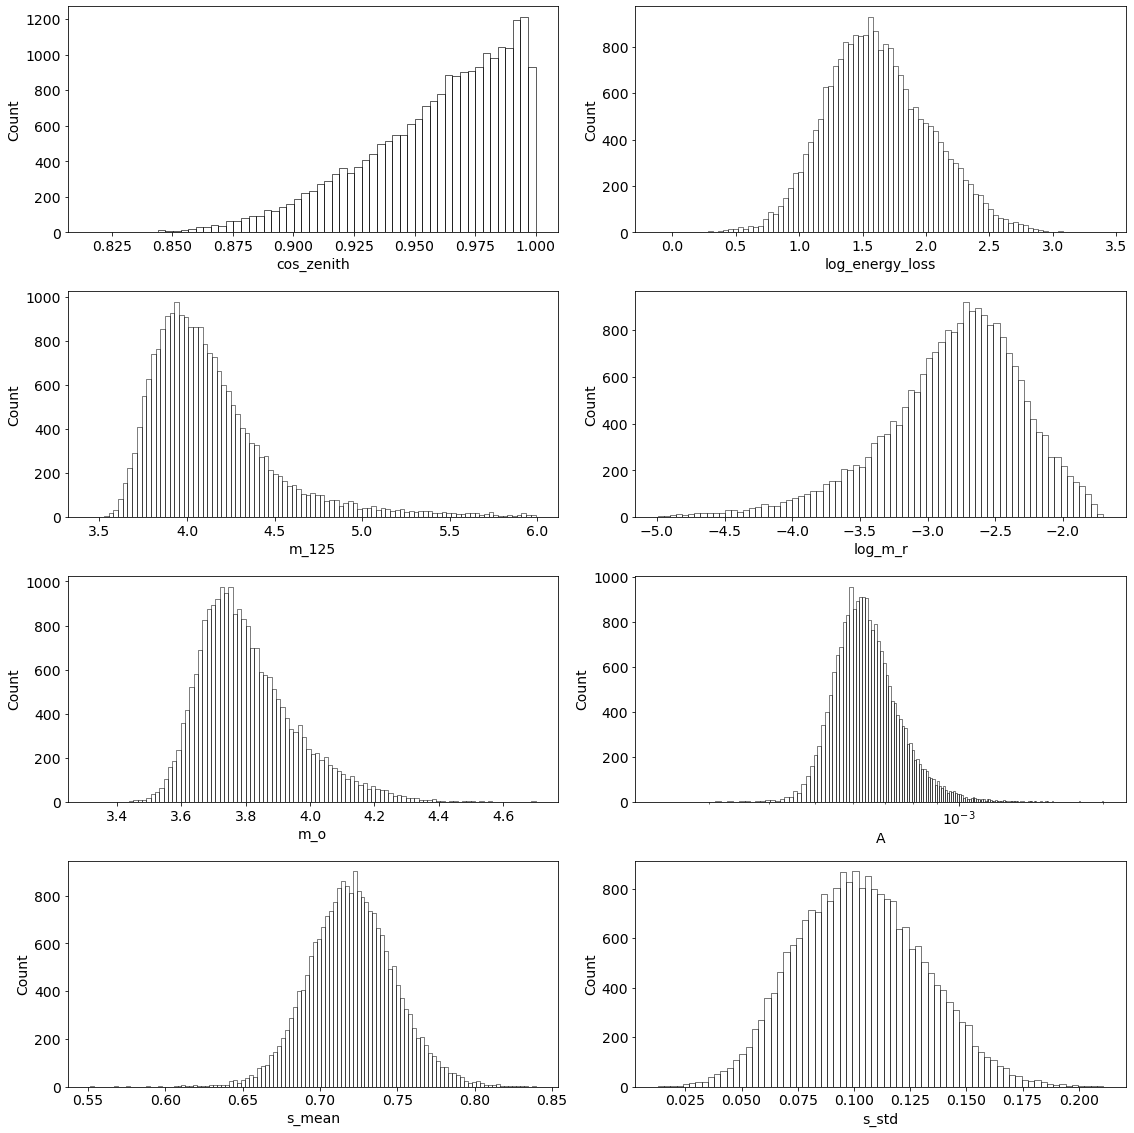

In [165]:
fig,axs = plt.subplots(4,2,figsize = (16,16))
count = 0
count2 = 0
for i in ['cos_zenith','log_energy_loss','m_125','log_m_r','m_o','A','s_mean','s_std']:
    sns.histplot(data_coinc[i],ax = axs[count,count2],fill=False,color='black')
    if i == 'A':
        axs[count,count2].set_xscale('log')
    count2 += 1
    if count2 == 2:
        count2 = 0
        count += 1
plt.tight_layout()
plt.savefig('Data_histograms.png')

In [166]:
len(df_coinc)

21630